<a href="https://colab.research.google.com/github/MohamamdAghaei/Acea-Smart-Water-Analytics/blob/main/Big_Data_project_Water_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importig and understanding data**

In [2]:
import pandas as pd
import seaborn as sns
from datetime import datetime, date

In [3]:
#Reading dataset
df = pd.read_csv('/content/lakes_fe.csv')

In [4]:
#Checking shape and size of the dataset
df.shape

(6603, 5)

In [5]:
df.head()

,Date,Mean_Rainfall,Mean_Temp,Actual_Flow_Rate,Actual_Lake_Level
0,0,2.857312,14.530141,2.578255,249.606745
1,1,2.857312,14.530141,2.578255,249.606745
2,2,2.857312,14.530141,2.578255,249.606745
3,3,2.857312,14.530141,2.578255,249.606745
4,4,2.857312,14.530141,2.578255,249.606745


In [6]:
#Finfing information and simultaneously finding Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               6603 non-null   int64  
 1   Mean_Rainfall      6603 non-null   float64
 2   Mean_Temp          6603 non-null   float64
 3   Actual_Flow_Rate   6603 non-null   float64
 4   Actual_Lake_Level  6603 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 258.1 KB


# **Preprocessing**

In [7]:
#Checking missing values
df.isnull().sum()

,0
Date,0
Mean_Rainfall,0
Mean_Temp,0
Actual_Flow_Rate,0
Actual_Lake_Level,0


In [8]:
#Cheking duplicate roes
print(df.duplicated().sum())

0


In [9]:
# Convert the 'Date' column to datetime format
# Assuming day 0 is '01/01/2006'
start_date = datetime(2006, 1, 1)
df['Date'] = start_date + pd.to_timedelta(df['Date'], unit='D')

# Display the DataFrame
df.head()

,Date,Mean_Rainfall,Mean_Temp,Actual_Flow_Rate,Actual_Lake_Level
0,2006-01-01,2.857312,14.530141,2.578255,249.606745
1,2006-01-02,2.857312,14.530141,2.578255,249.606745
2,2006-01-03,2.857312,14.530141,2.578255,249.606745
3,2006-01-04,2.857312,14.530141,2.578255,249.606745
4,2006-01-05,2.857312,14.530141,2.578255,249.606745


## **EDA**

# **Flow rate**

In [10]:
import matplotlib.pyplot as plt

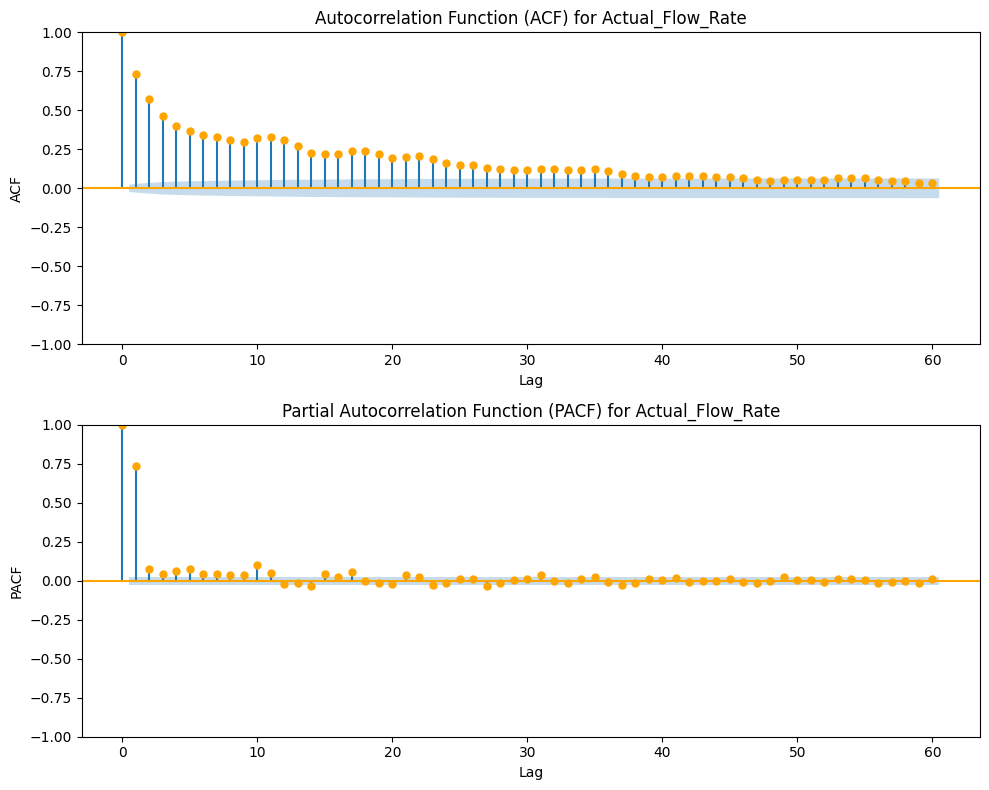

In [11]:
# prompt: make ACF AND PCAF for  Actual_Flow_Rate in oragane color 60 lags and make the plots blow each other

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt


fig, axes = plt.subplots(2, 1, figsize=(10, 8))
# Plot ACF for Actual_Flow_Rate
plot_acf(df['Actual_Flow_Rate'], ax=axes[0], lags=60, color='orange')
axes[0].set_title('Autocorrelation Function (ACF) for Actual_Flow_Rate')
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('ACF')
# Plot PACF for Actual_Flow_Rate
plot_pacf(df['Actual_Flow_Rate'], ax=axes[1], lags=60, color='orange')
axes[1].set_title('Partial Autocorrelation Function (PACF) for Actual_Flow_Rate')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('PACF')
plt.tight_layout()
plt.show()

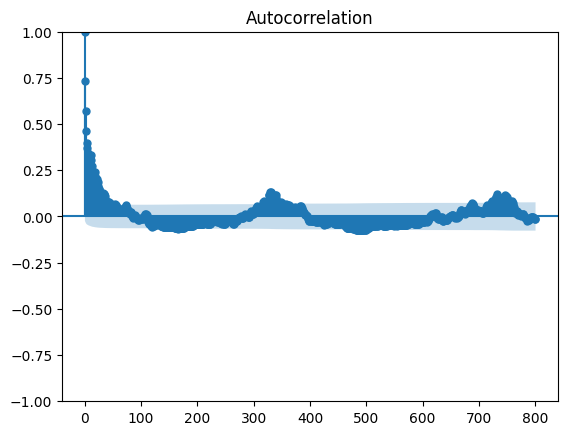

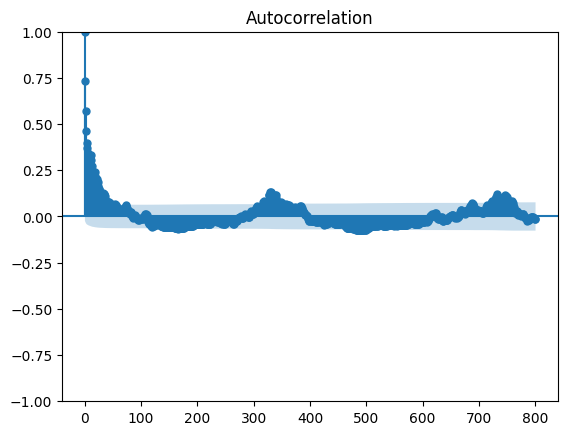

In [12]:

plot_acf(df['Actual_Flow_Rate'], lags=800)


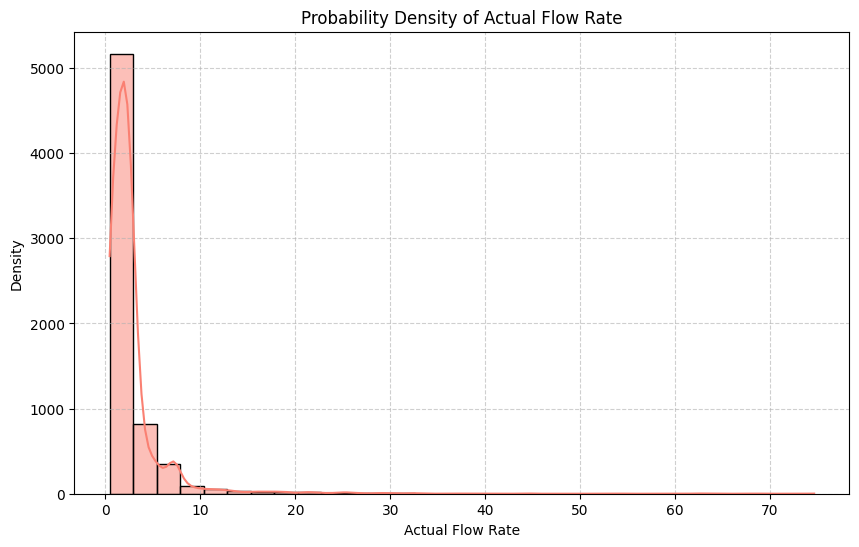

In [13]:
# prompt: make probability density for Actual_Flow_Rate

plt.figure(figsize=(10, 6))
sns.histplot(df['Actual_Flow_Rate'], kde=True, color='salmon', bins=30)
plt.title('Probability Density of Actual Flow Rate')
plt.xlabel('Actual Flow Rate')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [14]:
from statsmodels.tsa.stattools import adfuller

flow_rate = df['Actual_Flow_Rate']

# Run ADF Test
result = adfuller(flow_rate)

# Extract result components
adf_stat = result[0]
p_value = result[1]
used_lag = result[2]
n_obs = result[3]
critical_values = result[4]

# Print the results
print("ADF Statistic:", adf_stat)
print("p-value:", p_value)
print("Lags used:", used_lag)
print("Number of observations:", n_obs)
print("Critical Values:")
for key, value in critical_values.items():
    print(f"   {key}: {value}")

# Conclusion
if p_value < 0.05:
    print("\n✅ The series is likely STATIONARY (reject null hypothesis)")
else:
    print("\n❌ The series is likely NON-STATIONARY (fail to reject null hypothesis)")


ADF Statistic: -9.791564517287616
p-value: 6.333247220716143e-17
Lags used: 30
Number of observations: 6572
Critical Values:
   1%: -3.431345413269675
   5%: -2.861979888188583
   10%: -2.567004149029117

✅ The series is likely STATIONARY (reject null hypothesis)


In [15]:
import pandas as pd
from statsmodels.tsa.stattools import kpss

# Load your data
flow_rate = df['Actual_Flow_Rate']

# Perform KPSS test
# regression='c' checks for level stationarity
# regression='ct' checks for trend stationarity
statistic, p_value, lags, critical_values = kpss(flow_rate, regression='c', nlags='auto')

# Print results
print("KPSS Statistic:", statistic)
print("p-value:", p_value)
print("Lags used:", lags)
print("Critical Values:")
for key, value in critical_values.items():
    print(f"   {key}: {value}")

# Conclusion
if p_value < 0.05:
    print("\n❌ The series is likely NON-STATIONARY (reject null hypothesis)")
else:
    print("\n✅ The series is likely STATIONARY (fail to reject null hypothesis)")


KPSS Statistic: 0.08477613540529906
p-value: 0.1
Lags used: 44
Critical Values:
   10%: 0.347
   5%: 0.463
   2.5%: 0.574
   1%: 0.739

✅ The series is likely STATIONARY (fail to reject null hypothesis)


<ipython-input-15-3912021208>:10: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, lags, critical_values = kpss(flow_rate, regression='c', nlags='auto')


In [16]:
!pip install arch
from arch.unitroot import PhillipsPerron

# Load your dataset
flow_rate = df['Actual_Flow_Rate']

# Run the Phillips-Perron test
pp_test = PhillipsPerron(flow_rate)

# Print results
print("PP Statistic:", pp_test.stat)
print("p-value:", pp_test.pvalue)
print("Lags used:", pp_test.lags)
print("Trend type:", pp_test.trend)
print("\nConclusion:")
if pp_test.pvalue < 0.05:
    print("✅ The series is likely STATIONARY (reject null hypothesis)")
else:
    print("❌ The series is likely NON-STATIONARY (fail to reject null hypothesis)")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 11.6 MB/s eta 0:00:00
PP Statistic: -41.54750378727643
p-value: 0.0
Lags used: 35
Trend type: c

Conclusion:
✅ The series is likely STATIONARY (reject null hypothesis)


In [17]:
df.head()

,Date,Mean_Rainfall,Mean_Temp,Actual_Flow_Rate,Actual_Lake_Level
0,2006-01-01,2.857312,14.530141,2.578255,249.606745
1,2006-01-02,2.857312,14.530141,2.578255,249.606745
2,2006-01-03,2.857312,14.530141,2.578255,249.606745
3,2006-01-04,2.857312,14.530141,2.578255,249.606745
4,2006-01-05,2.857312,14.530141,2.578255,249.606745


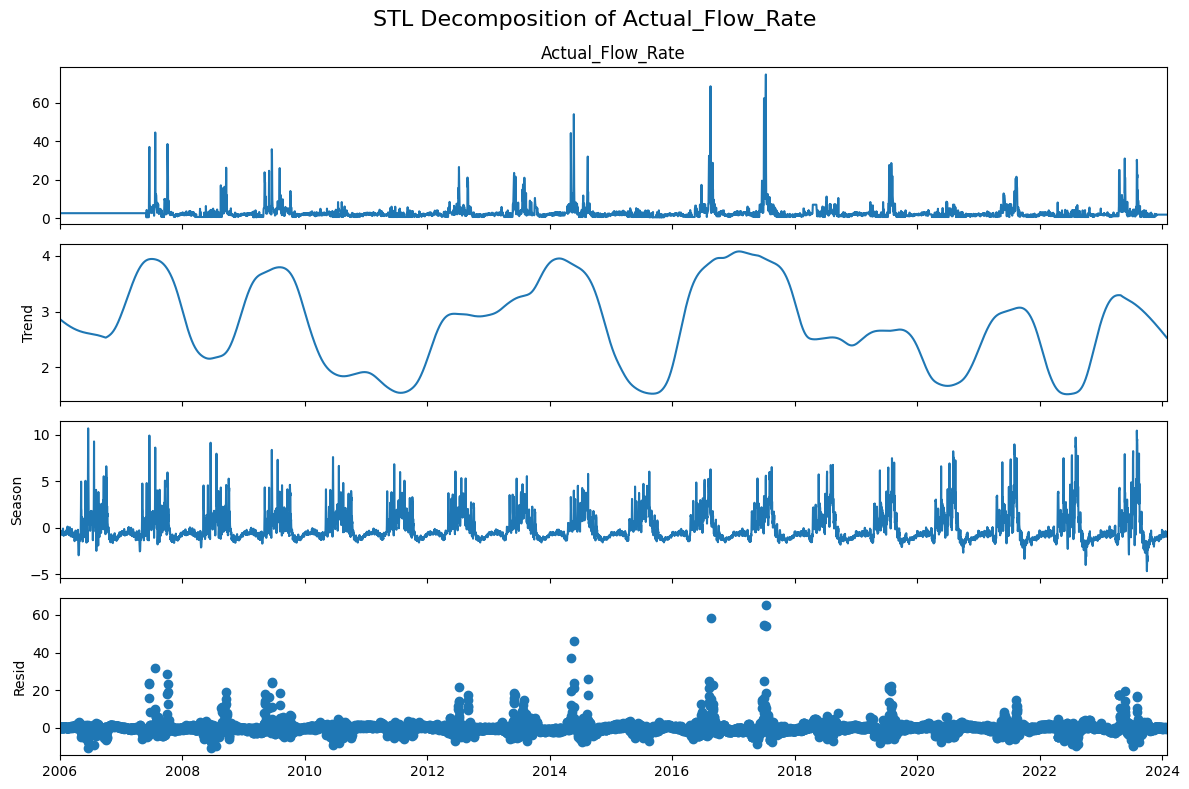

In [18]:
# Make a temporary copy and set index just for STL
df_temp = df.copy()
df_temp = df_temp.set_index('Date')

# Apply STL
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

series = df_temp['Actual_Flow_Rate']
stl = STL(series, period=365, seasonal=365, robust=False)
result = stl.fit()

# Plot
fig = result.plot()
fig.set_size_inches(12, 8)
plt.suptitle('STL Decomposition of Actual_Flow_Rate', fontsize=16)
plt.tight_layout()
plt.show()


In [19]:
df.head()

,Date,Mean_Rainfall,Mean_Temp,Actual_Flow_Rate,Actual_Lake_Level
0,2006-01-01,2.857312,14.530141,2.578255,249.606745
1,2006-01-02,2.857312,14.530141,2.578255,249.606745
2,2006-01-03,2.857312,14.530141,2.578255,249.606745
3,2006-01-04,2.857312,14.530141,2.578255,249.606745
4,2006-01-05,2.857312,14.530141,2.578255,249.606745


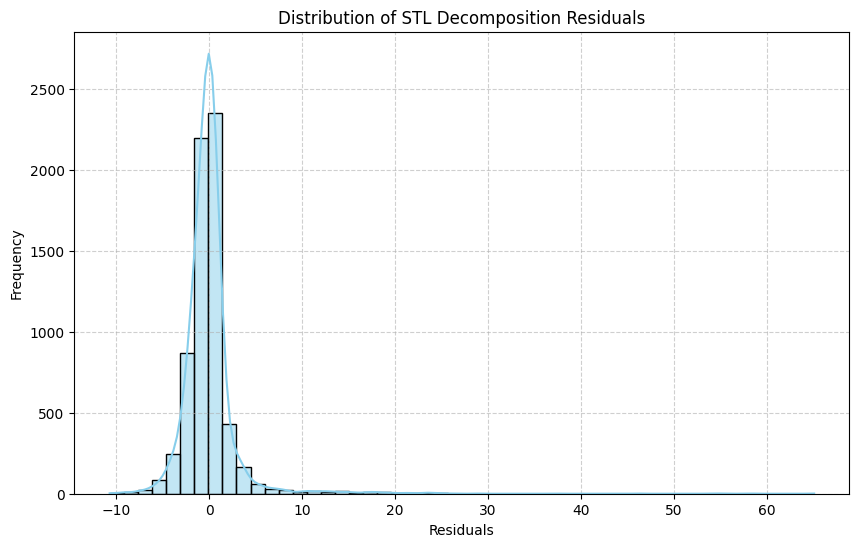

In [20]:
# prompt: make histogeram for resid of upper plot

# The result object from the last STL decomposition contains the residuals
residuals = result.resid

# Make histogram for residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='skyblue', bins=50)
plt.title('Distribution of STL Decomposition Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [21]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm
import numpy as np

# Get the residuals from your STL decomposition
residuals = result.resid

# Use a simple time-based independent variable (e.g., index range)
X = sm.add_constant(np.arange(len(residuals)))  # Add constant for intercept

# Run the Breusch-Pagan test
bp_test = het_breuschpagan(residuals, X)

# Organize results
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
results = dict(zip(labels, bp_test))

# Print formatted results
print("📊 Breusch-Pagan Test Results")
print("--------------------------------")
for label, value in results.items():
    print(f"{label:35}: {value:.4f}")

# Automatic interpretation
if results['p-value'] > 0.05:
    print("\n✅ Residuals appear to have constant variance (Homoscedasticity) — Fail to reject H₀")
else:
    print("\n❌ Residuals may have non-constant variance (Heteroscedasticity) — Reject H₀")


📊 Breusch-Pagan Test Results
--------------------------------
Lagrange multiplier statistic      : 0.2694
p-value                            : 0.6038
f-value                            : 0.2693
f p-value                          : 0.6038

✅ Residuals appear to have constant variance (Homoscedasticity) — Fail to reject H₀


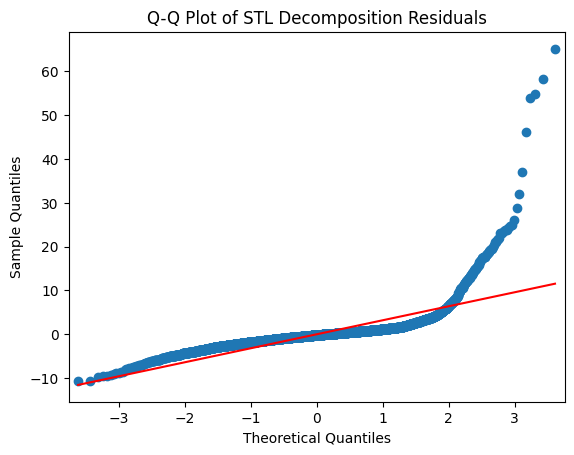

In [22]:
# prompt: make Q Q plot

import statsmodels.api as sm
# Get the residuals from your STL decomposition
residuals = result.resid
# Make Q-Q plot
sm.qqplot(residuals, line='s') # 's' for a standardized line
plt.title('Q-Q Plot of STL Decomposition Residuals')
plt.show()

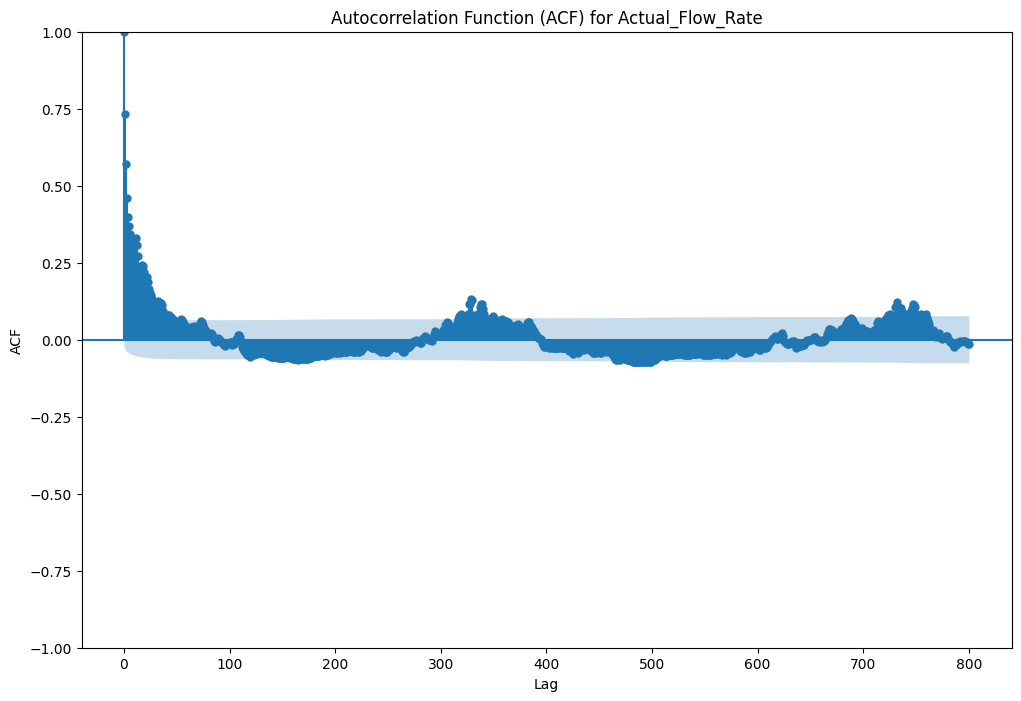

In [23]:
# prompt: check its autoccorelation withACF big plot

plt.figure(figsize=(12, 8)) # Make the plot bigger
plot_acf(df['Actual_Flow_Rate'], lags=800, ax=plt.gca()) # Use the larger figure for the plot
plt.title('Autocorrelation Function (ACF) for Actual_Flow_Rate') # Add a title
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.show()

In [24]:
df.head()

,Date,Mean_Rainfall,Mean_Temp,Actual_Flow_Rate,Actual_Lake_Level
0,2006-01-01,2.857312,14.530141,2.578255,249.606745
1,2006-01-02,2.857312,14.530141,2.578255,249.606745
2,2006-01-03,2.857312,14.530141,2.578255,249.606745
3,2006-01-04,2.857312,14.530141,2.578255,249.606745
4,2006-01-05,2.857312,14.530141,2.578255,249.606745


In [25]:
# prompt: make olmogorov

from statsmodels.stats.diagnostic import kstest_normal

# Get the residuals from your STL decomposition
residuals = result.resid

# Perform the Kolmogorov-Smirnov test against a normal distribution
ks_statistic, ks_p_value = kstest_normal(residuals)

# Print the results
print("Kolmogorov-Smirnov Test Results:")
print(f"KS Statistic: {ks_statistic:.4f}")
print(f"P-value: {ks_p_value:.4f}")

# Interpret the results
if ks_p_value > 0.05:
    print("\n✅ Residuals appear to follow a normal distribution (Fail to reject H₀)")
else:
    print("\n❌ Residuals do not appear to follow a normal distribution (Reject H₀)")

Kolmogorov-Smirnov Test Results:
KS Statistic: 0.2064
P-value: 0.0010

❌ Residuals do not appear to follow a normal distribution (Reject H₀)


In [26]:
from scipy.stats import zscore

z_scores = zscore(result.resid)
outliers = np.where(np.abs(z_scores) > 3)[0]

print(f"Number of detected outliers: {len(outliers)}")


Number of detected outliers: 105


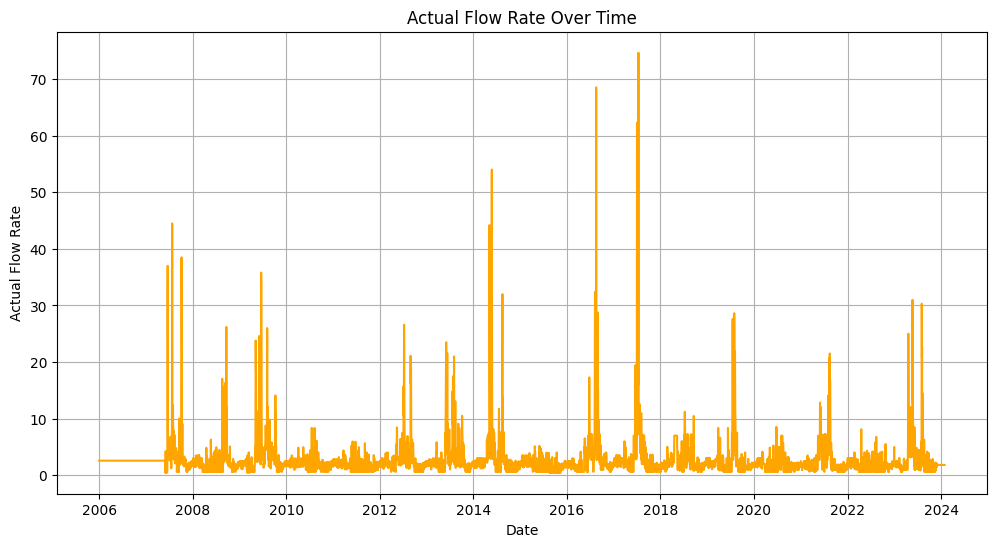

In [27]:
# plotting Date and Actual_Flow_Rate and the color orange

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Actual_Flow_Rate'], color='orange')
plt.xlabel('Date')
plt.ylabel('Actual Flow Rate')
plt.title('Actual Flow Rate Over Time')
plt.grid(True)
plt.show()


# Lake Flow Plots

In [ ]:
df['year'] = df['Date'].dt.year
df['day_of_year'] = df['Date'].dt.dayofyear

plt.figure(figsize=(12, 6))

for year in df['year'].unique():
    year_data = df[df['year'] == year]
    plt.plot(year_data['day_of_year'], year_data['Actual_Flow_Rate'], label=str(year))

plt.xlabel('Day of Year')
plt.ylabel('Actual Flow Rate')
plt.title('Actual Flow Rate Seasonality by Year')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Extract month
df['month'] = df['Date'].dt.month

# Group by month and calculate the mean Actual_Flow_Rate
monthly_flow_rate = df.groupby('month')['Actual_Flow_Rate'].mean()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
monthly_flow_rate.plot(kind='bar', color='coral')
plt.xlabel('Month')
plt.ylabel('Average Actual Flow Rate')
plt.title('Average Actual Flow Rate by Month')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [ ]:
def get_season(date):
    month = date.month
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Date'].apply(get_season)

# Group by season and calculate the mean Actual_Flow_Rate
seasonal_flow_rate = df.groupby('Season')['Actual_Flow_Rate'].mean()

# Define the order of seasons for the plot
season_order = ['Winter', 'Spring', 'Summer', 'Fall']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
seasonal_flow_rate.reindex(season_order).plot(kind='bar', color='skyblue')
plt.xlabel('Season')
plt.ylabel('Average Actual Flow Rate')
plt.title('Average Actual Flow Rate by Season')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [ ]:
# Group by year and calculate the mean Actual_Flow_Rate
yearly_flow_rate = df.groupby('year')['Actual_Flow_Rate'].mean()

# Find the year with the highest and lowest average flow rate
year_highest_rate = yearly_flow_rate.idxmax()
year_lowest_rate = yearly_flow_rate.idxmin()

print(f"Year with the highest average flow rate: {year_highest_rate} ({yearly_flow_rate.max():.2f})")
print(f"Year with the lowest average flow rate: {year_lowest_rate} ({yearly_flow_rate.min():.2f})")

# Optional: Plotting the yearly average flow rate for better visualization
plt.figure(figsize=(10, 6))
yearly_flow_rate.plot(kind='bar', color='teal')
plt.xlabel('Year')
plt.ylabel('Average Actual Flow Rate')
plt.title('Average Actual Flow Rate by Year')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# **Lake level**

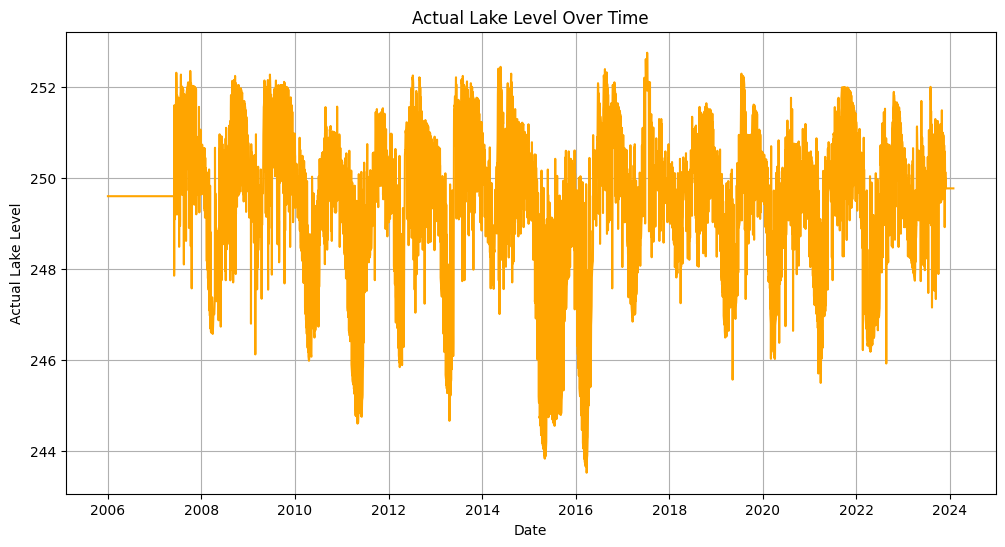

In [ ]:
#plottin Date and Actual_Lake_Level and the color orange

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Actual_Lake_Level'], color='orange')
plt.xlabel('Date')
plt.ylabel('Actual Lake Level')
plt.title('Actual Lake Level Over Time')
plt.grid(True)
plt.show()

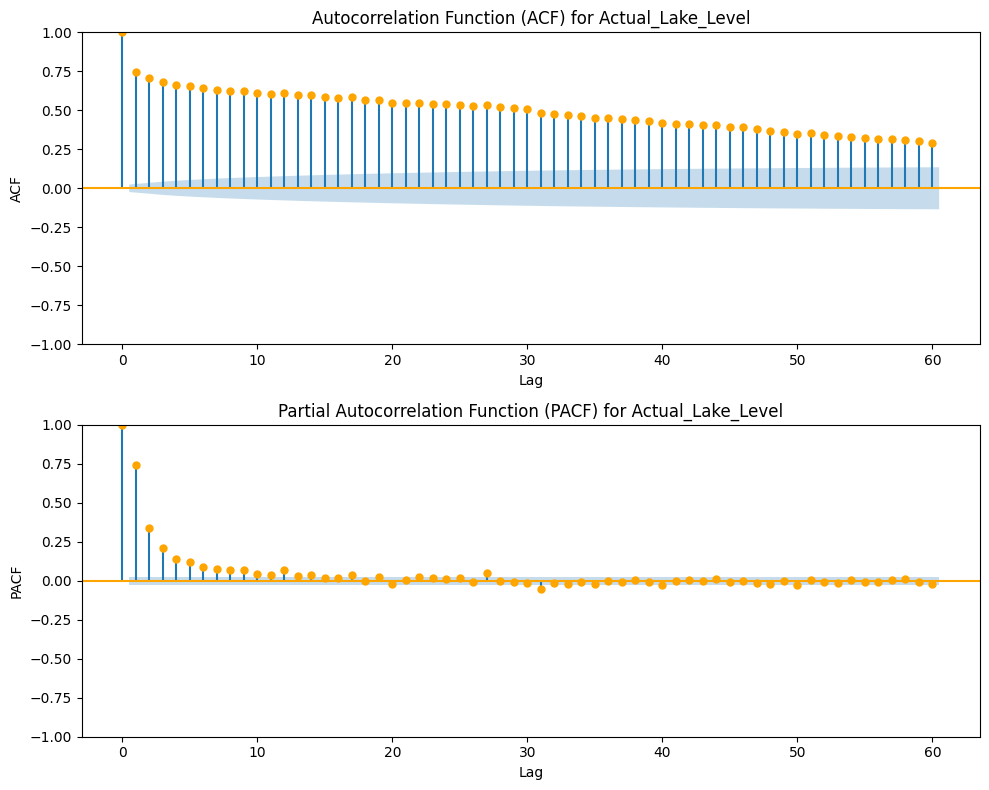

In [ ]:
# prompt: make ACF AND PCAF for  Actual_Lake_Level in oragane color 60 lags and make the plots blow each other

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
# Plot ACF for Actual_Lake_Level
plot_acf(df['Actual_Lake_Level'], ax=axes[0], lags=60, color='orange')
axes[0].set_title('Autocorrelation Function (ACF) for Actual_Lake_Level')
axes[0].set_xlabel('Lag')
axes[0].set_ylabel('ACF')
# Plot PACF for Actual_Lake_Level
plot_pacf(df['Actual_Lake_Level'], ax=axes[1], lags=60, color='orange')
axes[1].set_title('Partial Autocorrelation Function (PACF) for Actual_Lake_Level')
axes[1].set_xlabel('Lag')
axes[1].set_ylabel('PACF')
plt.tight_layout()
plt.show()

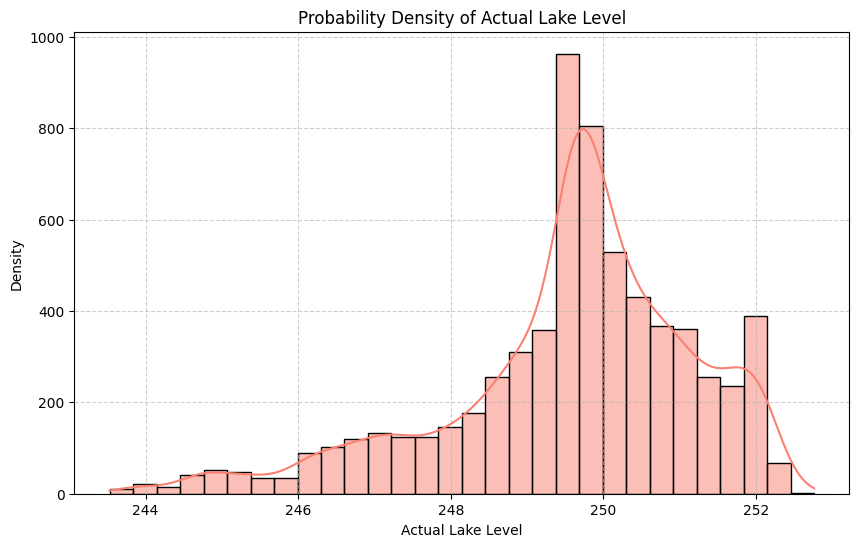

In [ ]:
# prompt: make probability density for Actual_Lake_Level

plt.figure(figsize=(10, 6))
sns.histplot(df['Actual_Lake_Level'], kde=True, color='salmon', bins=30)
plt.title('Probability Density of Actual Lake Level')
plt.xlabel('Actual Lake Level')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

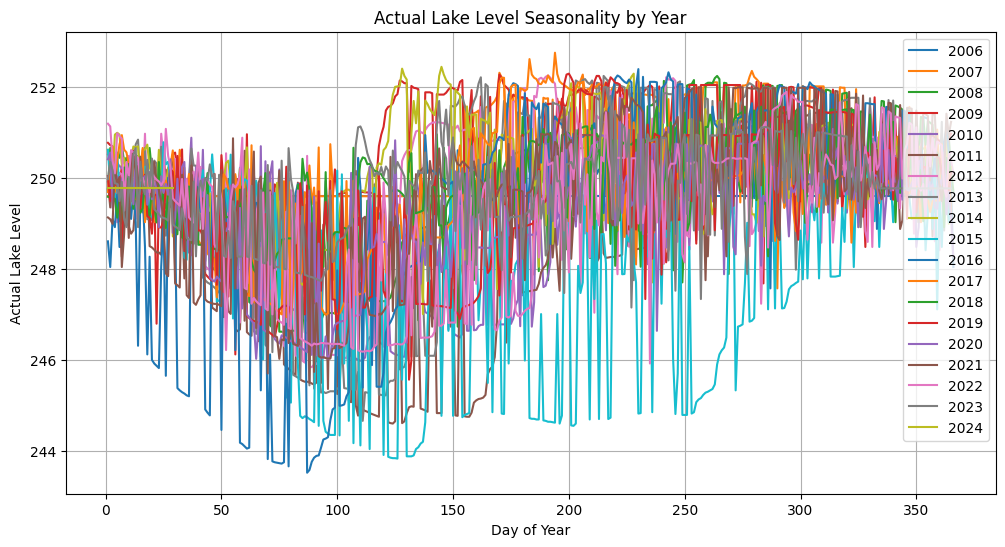

In [ ]:
#make plot of Actual_Lake_Level based on Date for seasonality all the years
df['year'] = df['Date'].dt.year
df['day_of_year'] = df['Date'].dt.dayofyear

plt.figure(figsize=(12, 6))

for year in df['year'].unique():
    year_data = df[df['year'] == year]
    plt.plot(year_data['day_of_year'], year_data['Actual_Lake_Level'], label=str(year))

plt.xlabel('Day of Year')
plt.ylabel('Actual Lake Level')
plt.title('Actual Lake Level Seasonality by Year')
plt.legend()
plt.grid(True)
plt.show()

Year with the maximum difference in Actual_Lake_Level: 2016 (Difference: 8.87)


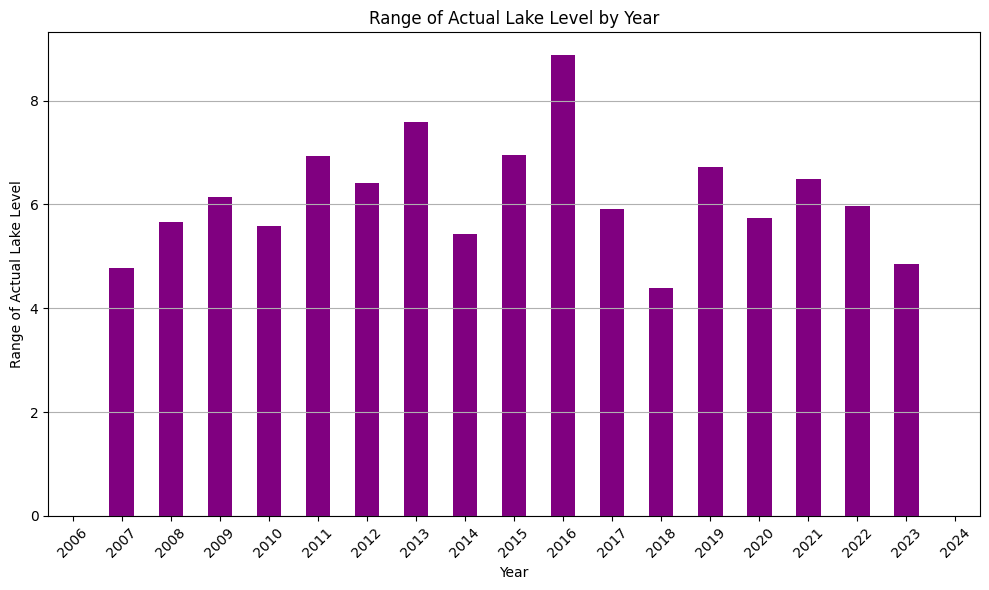

In [ ]:
# Calculate the range (max - min) of 'Actual_Lake_Level' for each year
yearly_level_range = df.groupby('year')['Actual_Lake_Level'].max() - df.groupby('year')['Actual_Lake_Level'].min()

# Find the year with the maximum difference
year_max_diff = yearly_level_range.idxmax()
max_diff_value = yearly_level_range.max()

print(f"Year with the maximum difference in Actual_Lake_Level: {year_max_diff} (Difference: {max_diff_value:.2f})")

# Optional: Plotting the yearly level range
plt.figure(figsize=(10, 6))
yearly_level_range.plot(kind='bar', color='purple')
plt.xlabel('Year')
plt.ylabel('Range of Actual Lake Level')
plt.title('Range of Actual Lake Level by Year')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

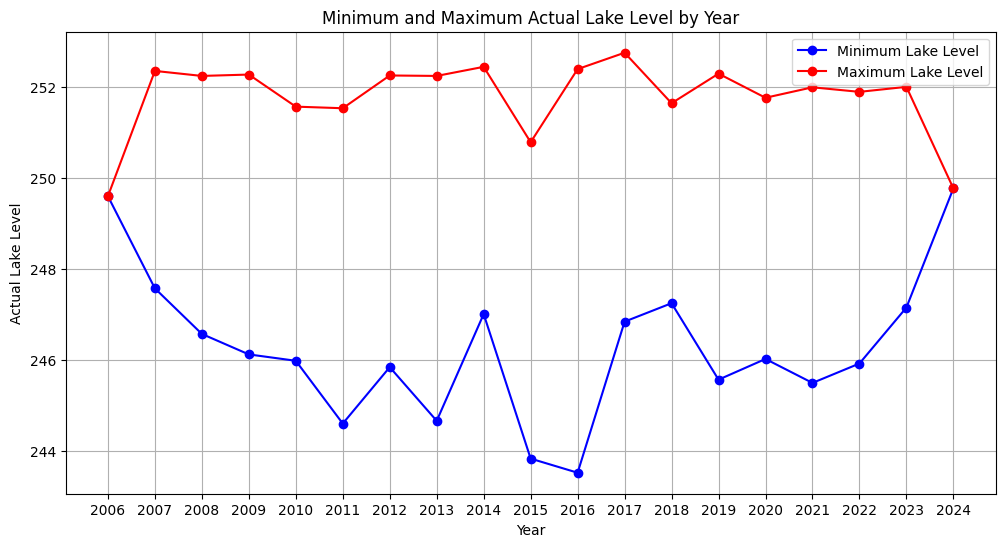

Minimum and Maximum Actual_Lake_Level for each year:
             min         max
year                        
2006  249.606745  249.606745
2007  247.581000  252.360000
2008  246.580000  252.250000
2009  246.130000  252.280000
2010  245.990000  251.575000
2011  244.610000  251.540000
2012  245.850000  252.260000
2013  244.670000  252.250000
2014  247.016667  252.450000
2015  243.840000  250.793333
2016  243.530000  252.400000
2017  246.850000  252.760000
2018  247.255000  251.650000
2019  245.575000  252.300000
2020  246.030000  251.770000
2021  245.503333  252.000000
2022  245.930000  251.900000
2023  247.160000  252.010000
2024  249.778750  249.778750


In [ ]:
# Group by year and calculate the minimum and maximum 'Actual_Lake_Level'
yearly_level_stats = df.groupby('year')['Actual_Lake_Level'].agg(['min', 'max'])

# Plotting the minimum and maximum lake levels for each year
plt.figure(figsize=(12, 6))

plt.plot(yearly_level_stats.index, yearly_level_stats['min'], marker='o', linestyle='-', label='Minimum Lake Level', color='blue')
plt.plot(yearly_level_stats.index, yearly_level_stats['max'], marker='o', linestyle='-', label='Maximum Lake Level', color='red')

plt.xlabel('Year')
plt.ylabel('Actual Lake Level')
plt.title('Minimum and Maximum Actual Lake Level by Year')
plt.legend()
plt.grid(True)
plt.xticks(yearly_level_stats.index) # Ensure all years are shown on the x-axis
plt.show()

# Print the min and max lake levels for each year
print("Minimum and Maximum Actual_Lake_Level for each year:")
print(yearly_level_stats)

**Rain fall and Temperature**

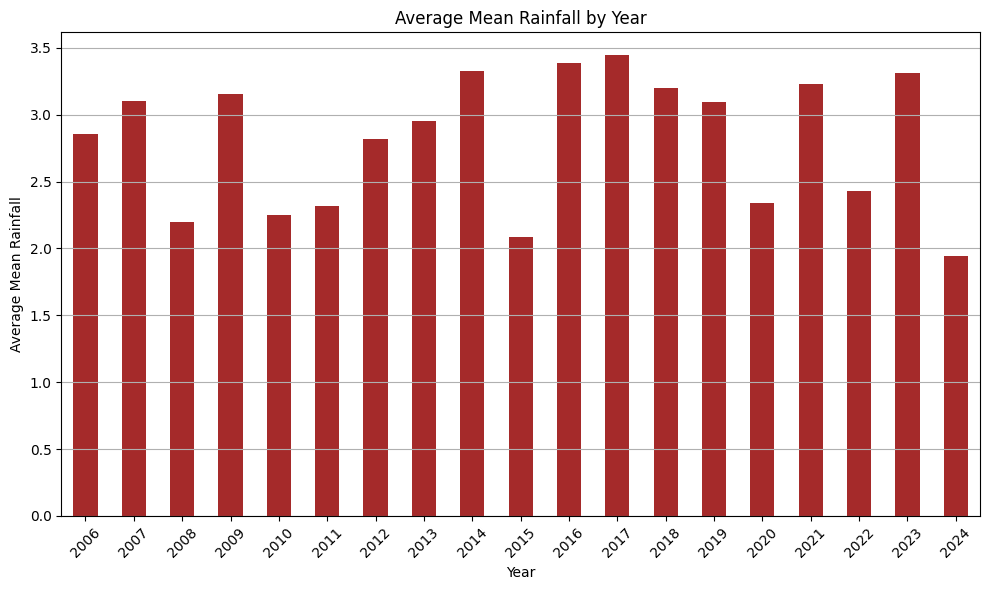

In [ ]:
# Group by year and calculate the mean Rainfall
yearly_rainfall = df.groupby('year')['Mean_Rainfall'].mean()

# Plotting the yearly average rainfall
plt.figure(figsize=(10, 6))
yearly_rainfall.plot(kind='bar', color='brown')
plt.xlabel('Year')
plt.ylabel('Average Mean Rainfall')
plt.title('Average Mean Rainfall by Year')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

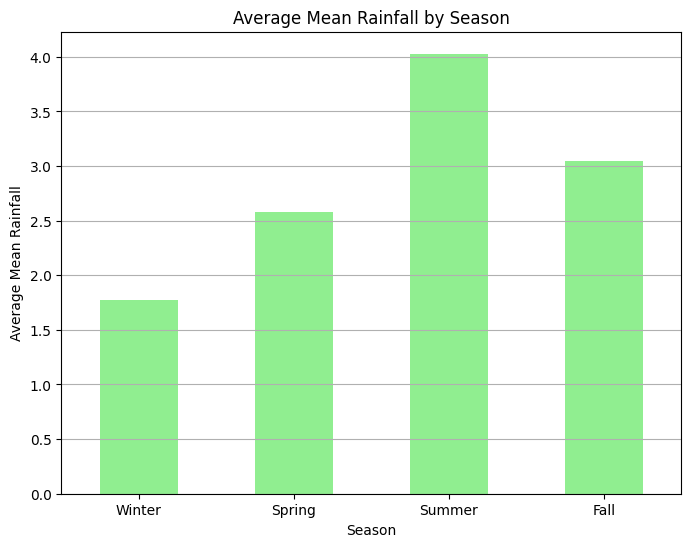

In [ ]:
# Group by season and calculate the mean Rainfall
seasonal_rainfall = df.groupby('Season')['Mean_Rainfall'].mean()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
seasonal_rainfall.reindex(season_order).plot(kind='bar', color='lightgreen')
plt.xlabel('Season')
plt.ylabel('Average Mean Rainfall')
plt.title('Average Mean Rainfall by Season')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

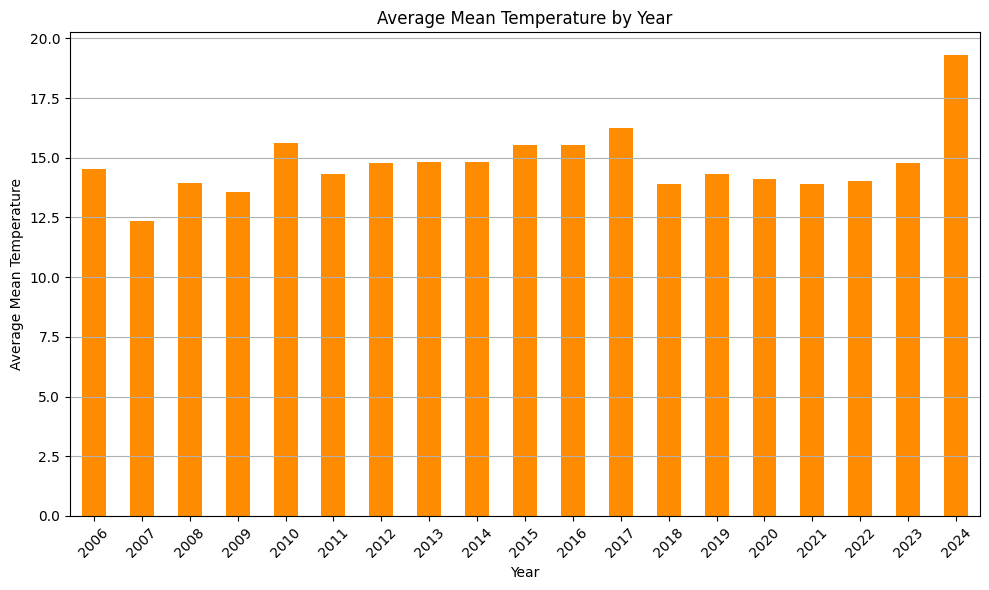

In [ ]:
# Group by year and calculate the mean Mean_Temp
yearly_temp = df.groupby('year')['Mean_Temp'].mean()

# Plotting the yearly average temperature
plt.figure(figsize=(10, 6))
yearly_temp.plot(kind='bar', color='darkorange')
plt.xlabel('Year')
plt.ylabel('Average Mean Temperature')
plt.title('Average Mean Temperature by Year')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

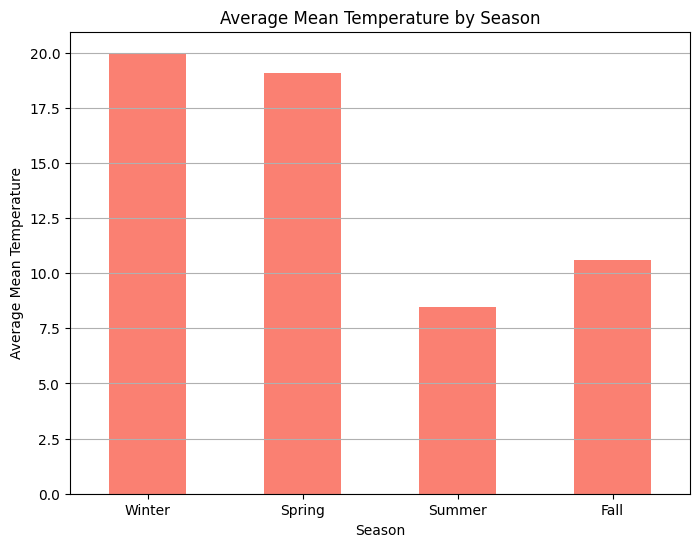

In [ ]:
# Group by season and calculate the mean Mean_Temp
seasonal_temp = df.groupby('Season')['Mean_Temp'].mean()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
seasonal_temp.reindex(season_order).plot(kind='bar', color='salmon')
plt.xlabel('Season')
plt.ylabel('Average Mean Temperature')
plt.title('Average Mean Temperature by Season')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

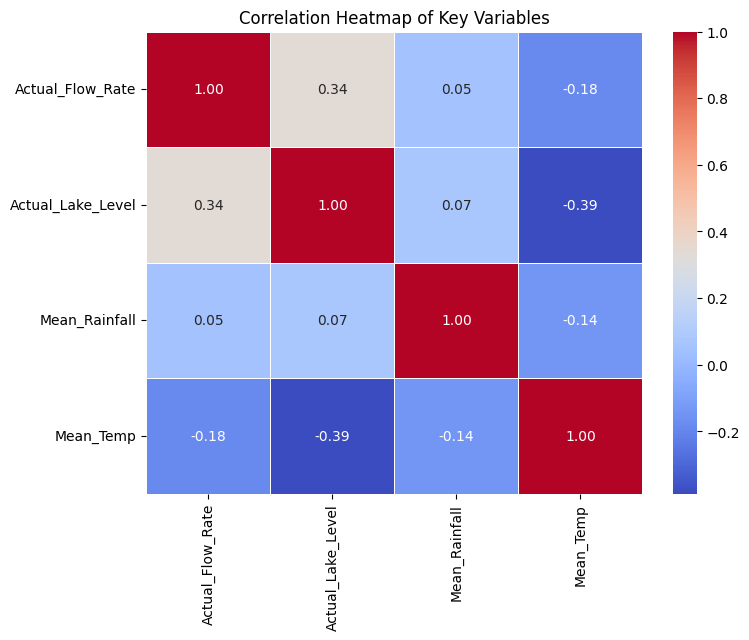

In [ ]:
# Select the columns for the heatmap
correlation_columns = ['Actual_Flow_Rate', 'Actual_Lake_Level', 'Mean_Rainfall', 'Mean_Temp']
df_corr = df[correlation_columns]

# Calculate the correlation matrix
correlation_matrix = df_corr.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Key Variables')
plt.show()

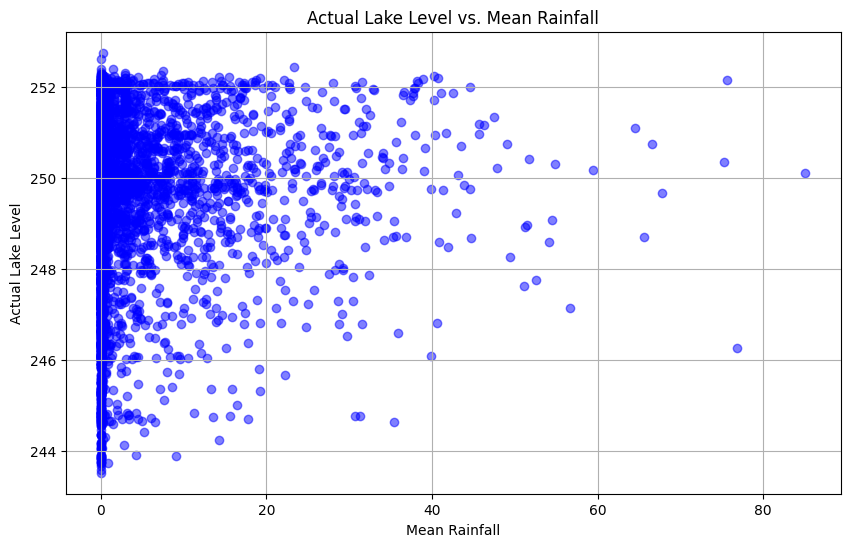

In [ ]:
# Make scatter plot

# Create a scatter plot of Mean_Rainfall vs Actual_Lake_Level
plt.figure(figsize=(10, 6))
plt.scatter(df['Mean_Rainfall'], df['Actual_Lake_Level'], alpha=0.5, color='blue')
plt.xlabel('Mean Rainfall')
plt.ylabel('Actual Lake Level')
plt.title('Actual Lake Level vs. Mean Rainfall')
plt.grid(True)
plt.show()

# **Pre processing**

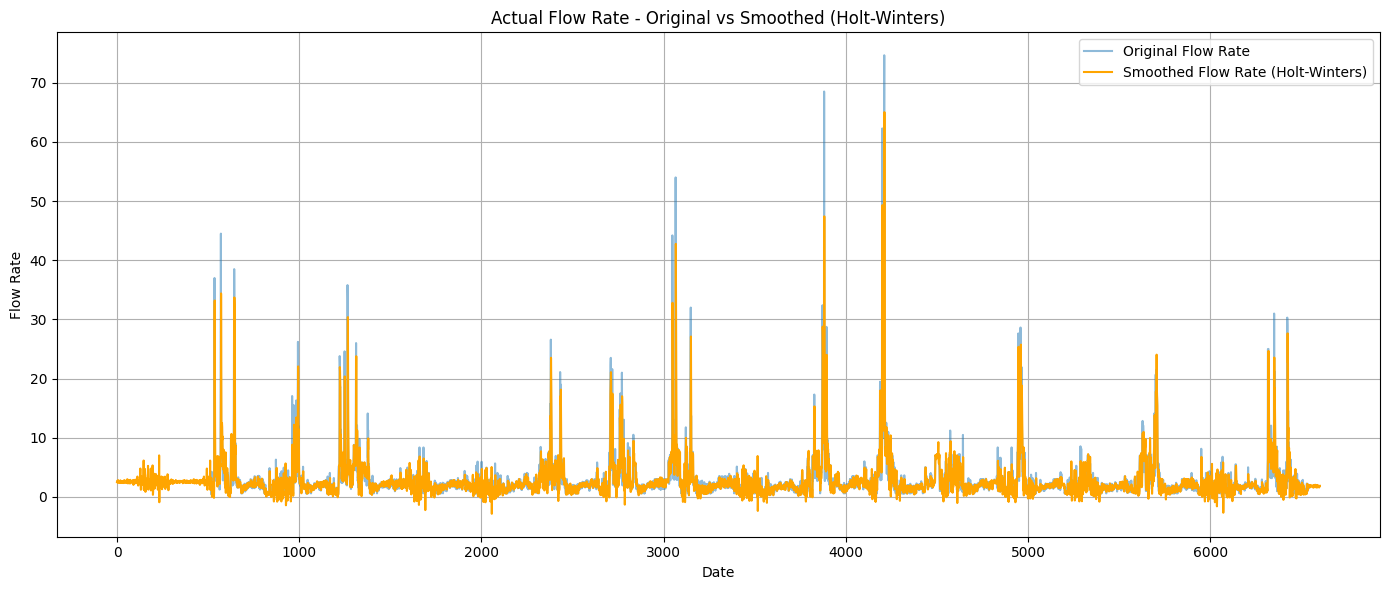

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing


# Select the column for smoothing
series = df['Actual_Flow_Rate']

# Apply Holt-Winters Exponential Smoothing
model = ExponentialSmoothing(series, trend='add', seasonal='add', seasonal_periods=365)
fit_model = model.fit()

# Add smoothed series to the DataFrame (optional)
df['Smoothed_Flow'] = fit_model.fittedvalues

# Plot the original and smoothed series
plt.figure(figsize=(14, 6))
plt.plot(series, label='Original Flow Rate', alpha=0.5)
plt.plot(df['Smoothed_Flow'], label='Smoothed Flow Rate (Holt-Winters)', color='orange')
plt.title("Actual Flow Rate - Original vs Smoothed (Holt-Winters)")
plt.xlabel("Date")
plt.ylabel("Flow Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
df.head()

,Date,Mean_Rainfall,Mean_Temp,Actual_Flow_Rate,Actual_Lake_Level,Smoothed_Flow
0,2006-01-01,2.857312,14.530141,2.578255,249.606745,2.499118
1,2006-01-02,2.857312,14.530141,2.578255,249.606745,2.535799
2,2006-01-03,2.857312,14.530141,2.578255,249.606745,2.723050
3,2006-01-04,2.857312,14.530141,2.578255,249.606745,2.772444
4,2006-01-05,2.857312,14.530141,2.578255,249.606745,2.398411


In [30]:
# prompt: drop Actual_Flow_Rate

df_smooth = df.copy()
df_smooth = df_smooth.drop(columns=['Actual_Flow_Rate'])
df_smooth.head()

,Date,Mean_Rainfall,Mean_Temp,Actual_Lake_Level,Smoothed_Flow
0,2006-01-01,2.857312,14.530141,249.606745,2.499118
1,2006-01-02,2.857312,14.530141,249.606745,2.535799
2,2006-01-03,2.857312,14.530141,249.606745,2.723050
3,2006-01-04,2.857312,14.530141,249.606745,2.772444
4,2006-01-05,2.857312,14.530141,249.606745,2.398411


In [31]:
df_original = df.copy()
df_original = df_original.drop(columns=['Smoothed_Flow'])
df_original.head()

,Date,Mean_Rainfall,Mean_Temp,Actual_Flow_Rate,Actual_Lake_Level
0,2006-01-01,2.857312,14.530141,2.578255,249.606745
1,2006-01-02,2.857312,14.530141,2.578255,249.606745
2,2006-01-03,2.857312,14.530141,2.578255,249.606745
3,2006-01-04,2.857312,14.530141,2.578255,249.606745
4,2006-01-05,2.857312,14.530141,2.578255,249.606745


In [32]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler





# ✅ Optional: If you only want to scale specific features, set them manually like this:
numeric_columns = ['Mean_Temp', 'Mean_Rainfall', 'Actual_Lake_Level']

'''# 1. Min-Max Scaling (scales values to range [0, 1])
minmax_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[numeric_columns] = minmax_scaler.fit_transform(df[numeric_columns])'''

# 2. Standard (Z-score) Scaling (mean=0, std=1)
zscore_scaler = StandardScaler()
df_zscore = df_smooth.copy()
df_zscore[numeric_columns] = zscore_scaler.fit_transform(df[numeric_columns])

# Now you can use df_minmax or df_zscore for your modeling


In [33]:
df_zscore.head()

,Date,Mean_Rainfall,Mean_Temp,Actual_Lake_Level,Smoothed_Flow
0,2006-01-01,1.269622e-16,-0.000085,0.028615,2.499118
1,2006-01-02,1.269622e-16,-0.000085,0.028615,2.535799
2,2006-01-03,1.269622e-16,-0.000085,0.028615,2.723050
3,2006-01-04,1.269622e-16,-0.000085,0.028615,2.772444
4,2006-01-05,1.269622e-16,-0.000085,0.028615,2.398411


# **AR(2)**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


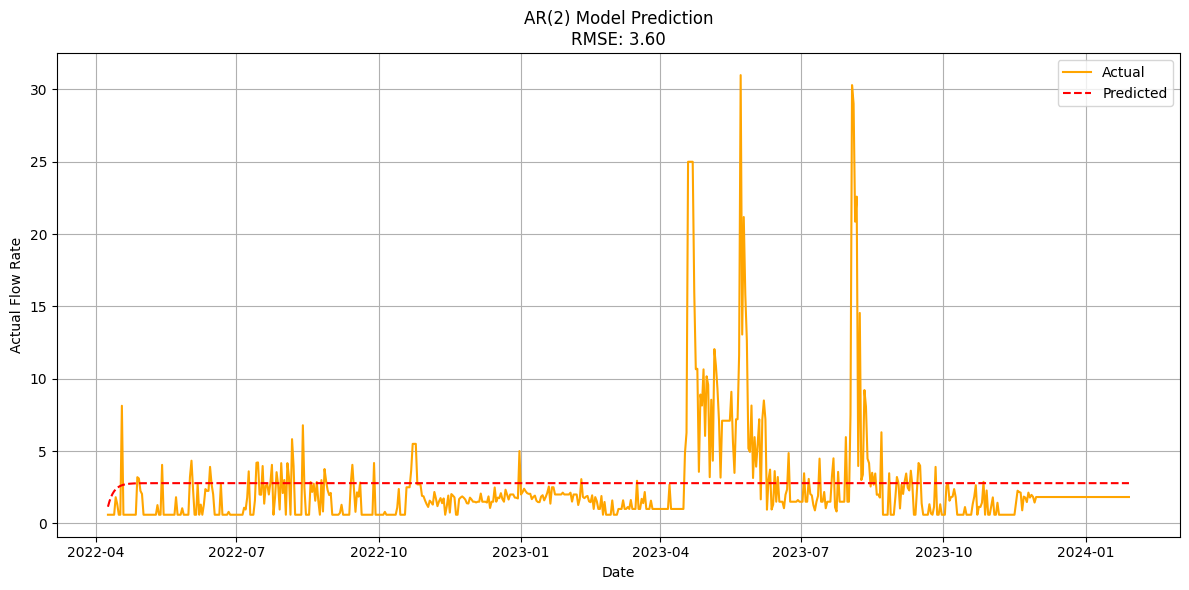

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
df_test= df_original.copy()

# Keep the 'Date' column and use it as temporary index
df_indexed = df_test.set_index('Date', drop=False)

# Select the target time series
series = df_indexed['Actual_Flow_Rate']

# Split into training and testing sets
split_index = int(len(series) * 0.9)
train, test = series[:split_index], series[split_index:]

# Fit AR model with lag=2 (you can change this based on PACF)
model = AutoReg(train, lags=2).fit()

# Predict the test set
predictions = model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Evaluate the model
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual', color='orange')
plt.plot(test.index, predictions, label='Predicted', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Actual Flow Rate')
plt.title(f'AR(2) Model Prediction\nRMSE: {rmse:.2f}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


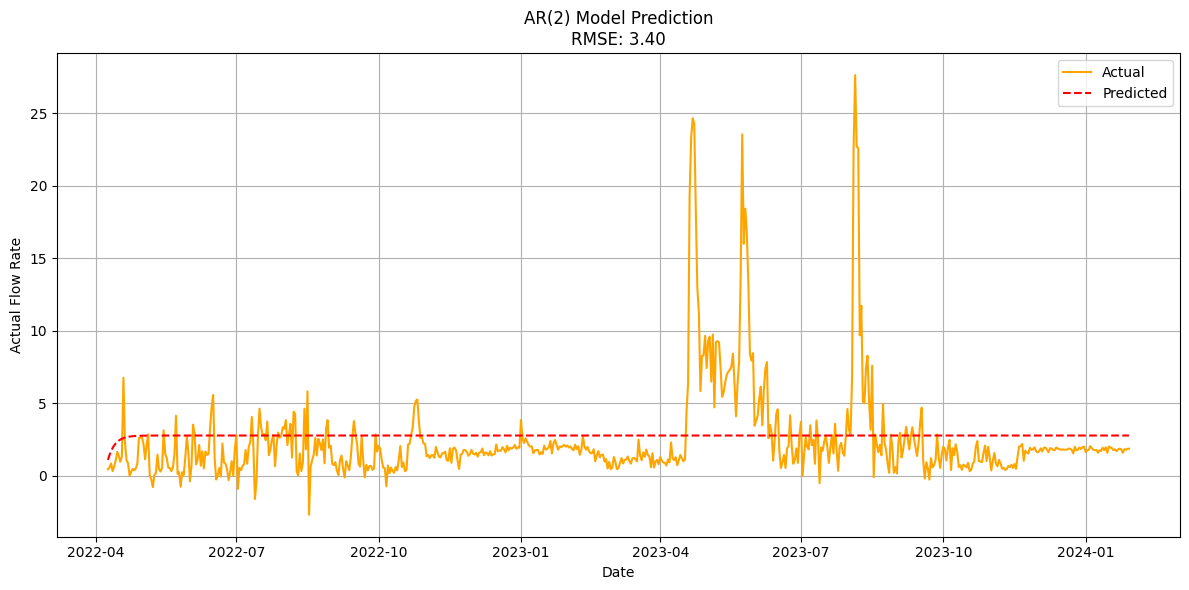

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy as np

# Load the dataset
df_test= df_zscore.copy()

# Keep the 'Date' column and use it as temporary index
df_indexed = df_test.set_index('Date', drop=False)

# Select the target time series
series = df_indexed['Smoothed_Flow']

# Split into training and testing sets
split_index = int(len(series) * 0.9)
train, test = series[:split_index], series[split_index:]

# Fit AR model with lag=2 (you can change this based on PACF)
model = AutoReg(train, lags=2).fit()

# Predict the test set
predictions = model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

# Evaluate the model
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)

# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(test.index, test, label='Actual', color='orange')
plt.plot(test.index, predictions, label='Predicted', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Actual Flow Rate')
plt.title(f'AR(2) Model Prediction\nRMSE: {rmse:.2f}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


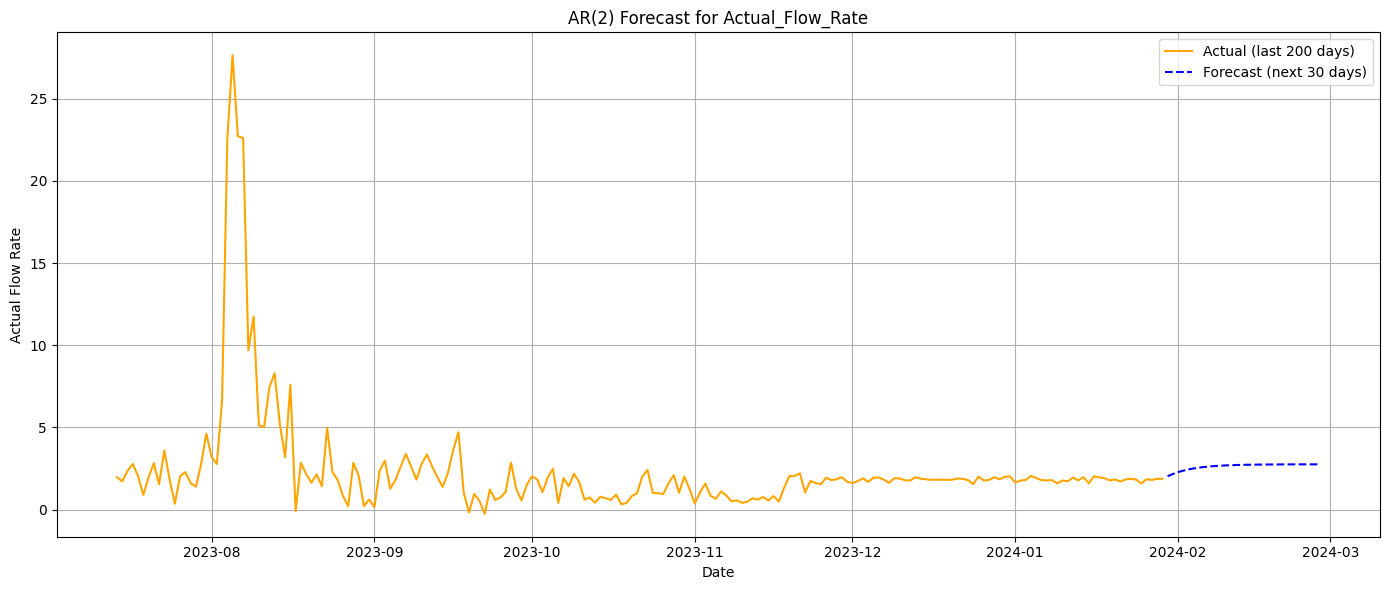

In [36]:
# Install required packages (if not already installed)
!pip install statsmodels --quiet

# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy as np

# Load your dataset (make sure to upload it first in Colab)


# Select the target time series
series = df_indexed['Smoothed_Flow']

# Fit AR(2) model on the whole series
model = AutoReg(series, lags=2)
model_fit = model.fit()

# Forecast the next 30 days
forecast_steps = 30
forecast = model_fit.predict(start=len(series), end=len(series)+forecast_steps-1)

# Create future dates
last_date = series.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=forecast_steps)

# Plot the result
plt.figure(figsize=(14, 6))
plt.plot(series[-200:], label='Actual (last 200 days)', color='orange')
plt.plot(future_dates, forecast, label='Forecast (next 30 days)', linestyle='--', color='blue')
plt.title('AR(2) Forecast for Actual_Flow_Rate')
plt.xlabel('Date')
plt.ylabel('Actual Flow Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **MA models**

# **Armax**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:          Smoothed_Flow   No. Observations:                 5282
Model:               SARIMAX(2, 0, 2)   Log Likelihood              -11310.406
Date:                Sun, 15 Jun 2025   AIC                          22636.811
Time:                        15:22:45   BIC                          22689.383
Sample:                    01-01-2006   HQIC                         22655.186
                         - 06-17-2020                                         
Covariance Type:                  opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Mean_Rainfall         0.0758      0.019      3.914      0.000       0.038       0.114
Mean_Temp            -0.3186      0.085     -3.763      0.000      -0.485      -0.153
Actual_Lake_Level     0.

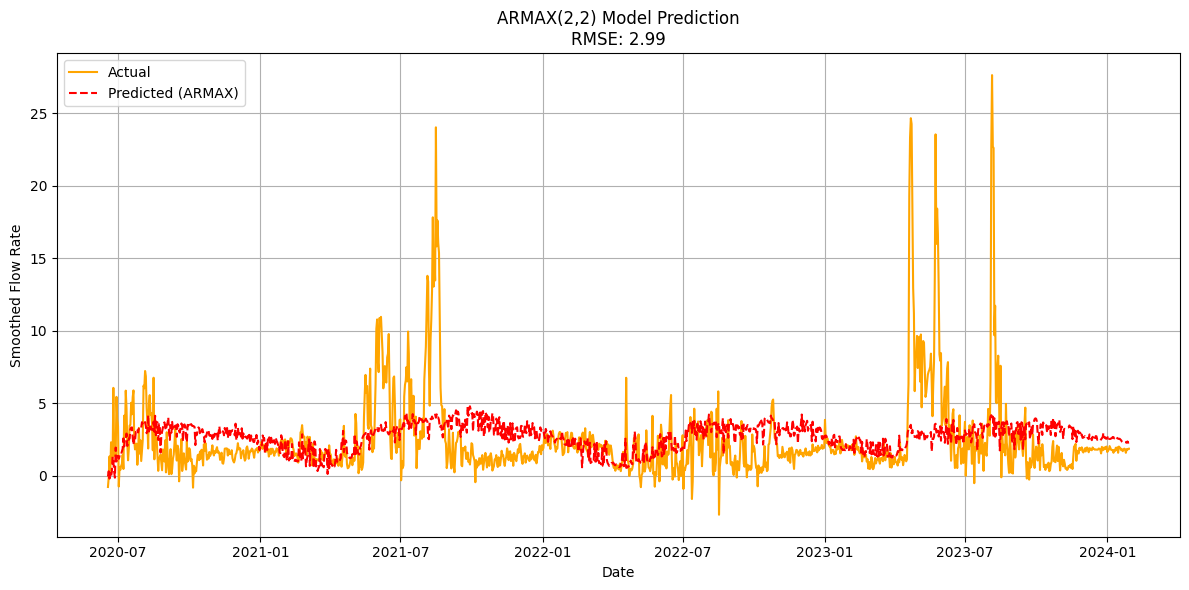


Forecasting with ARMAX requires future values for the exogenous variables (Mean_Rainfall, Mean_Temp).
To make a real forecast, you would first need to forecast these exogenous variables.
The code for prediction on the test set above shows how to use ARMAX when exogenous data is available.


In [36]:
# prompt: apply Armax on my data

# Install required packages (if not already installed)
!pip install statsmodels --quiet

# Import libraries
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the dataset (make sure to upload it first in Colab)
# Assume df and df_indexed are already defined from the preceding code

# Select the target time series and potential exogenous variables
# For ARMAX, we need a time series and one or more other time series that are related.
# Let's assume 'Mean_Rainfall' and 'Mean_Temp' are exogenous variables.
# Ensure these columns are in your df_indexed DataFrame.
# If they are not, you'll need to adjust the preceding code to include them.

# Select the target time series
series = df_indexed['Smoothed_Flow']

# Select exogenous variables - make sure they align with the series index
# We need to make sure the exogenous data spans the same time period as the series.
# Let's use the corresponding columns from df_indexed
exog_data = df_indexed[['Mean_Rainfall', 'Mean_Temp', 'Actual_Lake_Level']]

# Ensure the exogenous data index matches the time series index
if not series.index.equals(exog_data.index):
    print("Warning: Index mismatch between series and exogenous data.")
    # Handle mismatch if necessary, e.g., align indices or resample

# Split into training and testing sets - make sure to split exogenous data too
split_index = int(len(series) * 0.8)
train_series, test_series = series[:split_index], series[split_index:]
train_exog, test_exog = exog_data[:split_index], exog_data[split_index:]


# Fit ARMAX model
# (p, d, q) for AR, I (differencing - usually 0 for ARMAX), MA orders
# For ARMAX, the model is SARIMAX(p, 0, q) with exogenous variables.
# You would determine appropriate p and q values from ACF/PACF of the series
# or by iterating and evaluating models.
# Let's start with a simple example, e.g., AR(2), MA(1) based on common practice or previous analysis.
p_order = 2
q_order = 2

# Define the ARMAX model order (AR order, differencing, MA order)
order = (p_order, 0, q_order)

# Fit the SARIMAX model (used for ARMAX by setting d=0 and adding exog)
# Set enforce_stationarity=False and enforce_invertibility=False if the data is already differenced
# or if you are not sure about the model parameters.
model = SARIMAX(train_series,
                exog=train_exog,
                order=order,
                enforce_stationarity=False,
                enforce_invertibility=False)

model_fit = model.fit(disp=False) # disp=False suppresses convergence output

print(model_fit.summary())

# Predict the test set
# Note: When predicting with ARMAX, you MUST provide future values for the exogenous variables
predictions = model_fit.predict(start=len(train_series), end=len(train_series)+len(test_series)-1, exog=test_exog)


# Evaluate the model
mse = mean_squared_error(test_series, predictions)
rmse = np.sqrt(mse)

# Plot predictions vs actual
plt.figure(figsize=(12, 6))
plt.plot(test_series.index, test_series, label='Actual', color='orange')
plt.plot(test_series.index, predictions, label='Predicted (ARMAX)', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Smoothed Flow Rate')
plt.title(f'ARMAX({p_order},{q_order}) Model Prediction\nRMSE: {rmse:.2f}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Forecasting with ARMAX
# To forecast future values, you need future values of the exogenous variables.
# You would typically need to forecast 'Mean_Rainfall' and 'Mean_Temp' separately
# or use external forecasts for these variables.
# For this example, we cannot simply forecast without future exog values.
# If you had external forecasts for 'Mean_Rainfall' and 'Mean_Temp' for the next 30 days,
# you would pass them to the predict method:
# forecast_steps = 30
# future_exog_data = # DataFrame with future rainfall and temperature forecasts for 30 days
# future_dates = pd.date_range(start=series.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)
# future_exog_data.index = future_dates # Make sure index matches

# forecast = model_fit.predict(start=len(series), end=len(series)+forecast_steps-1, exog=future_exog_data)

# If you just want to demonstrate forecasting without actual future exog,
# you might use the *last known* exogenous values, but this is usually not a good forecasting practice
# unless the exogenous variables are expected to be constant.
# Let's show how you would call predict if you HAD future exog data:

# Example placeholder for future exogenous data (replace with actual forecasts)
# If you don't have future exog data, you cannot realistically forecast with ARMAX.
# The code below is illustrative *if* you had future_exog_data
"""
# Placeholder for future exogenous data (example - replace with actual forecasts)
forecast_steps = 30
last_exog_values = exog_data.iloc[-1].values.reshape(1, -1)
# Assuming the last known values repeat for the forecast period (VERY SIMPLISTIC!)
future_exog_data_placeholder = pd.DataFrame(
    np.repeat(last_exog_values, forecast_steps, axis=0),
    columns=exog_data.columns
)
future_dates = pd.date_range(start=series.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)
future_exog_data_placeholder.index = future_dates

# Forecast using the placeholder future exogenous data
forecast = model_fit.predict(start=len(series), end=len(series)+forecast_steps-1, exog=future_exog_data_placeholder)

# Plot the result (using the placeholder forecast)
plt.figure(figsize=(14, 6))
plt.plot(series[-200:], label='Actual (last 200 days)', color='orange')
plt.plot(future_dates, forecast, label='ARMAX Forecast (next 30 days - using placeholder exog)', linestyle='--', color='blue')
plt.title(f'ARMAX({p_order},{q_order}) Forecast for Smoothed_Flow (Placeholder Exog)')
plt.xlabel('Date')
plt.ylabel('Smoothed Flow Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
"""

# Conclusion on Forecasting with ARMAX:
print("\nForecasting with ARMAX requires future values for the exogenous variables (Mean_Rainfall, Mean_Temp).")
print("To make a real forecast, you would first need to forecast these exogenous variables.")
print("The code for prediction on the test set above shows how to use ARMAX when exogenous data is available.")


<ipython-input-47-3407949784>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y_monthly = df_indexed["Smoothed_Flow"].resample("M").mean()


                                     SARIMAX Results                                      
Dep. Variable:                      Smoothed_Flow   No. Observations:                  217
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood                -435.977
Date:                            Sun, 15 Jun 2025   AIC                            881.954
Time:                                    18:13:41   BIC                            898.569
Sample:                                01-31-2006   HQIC                           888.675
                                     - 01-31-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0006      0.250      0.002      0.998      -0.490       0.491
ma.L1          0.3658      0.252   

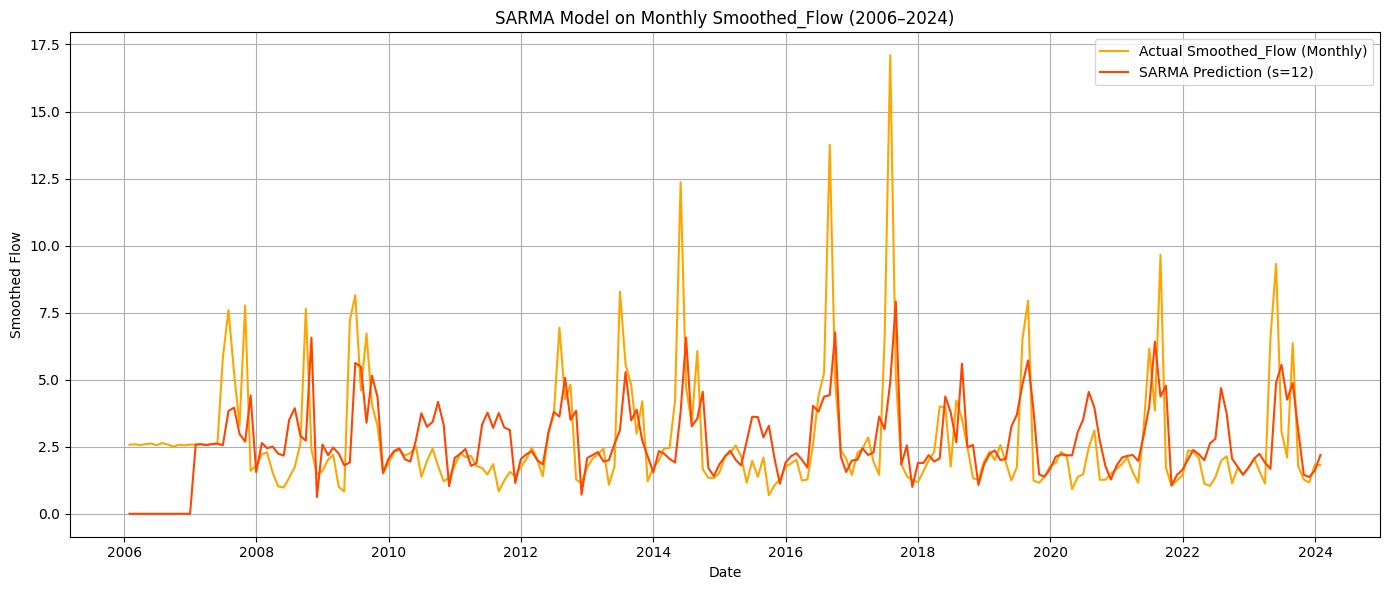

In [47]:
# 📦 Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from google.colab import files



# 🟠 Convert daily data to monthly average
y_monthly = df_indexed["Smoothed_Flow"].resample("M").mean()

# 🧠 Fit SARMA model: ARMA(1,1) + seasonal ARMA(1,1,12)
model = SARIMAX(
    y_monthly,
    order=(1, 0, 1),
    seasonal_order=(1, 1, 1, 12),  # yearly seasonality
    enforce_stationarity=True,
    enforce_invertibility=True
)

results = model.fit(disp=False)

# 🧾 Summary (optional)
print(results.summary())

# 📊 In-sample prediction
y_pred = results.fittedvalues

# 📈 Plot actual vs predicted
plt.figure(figsize=(14, 6))
plt.plot(y_monthly, label='Actual Smoothed_Flow (Monthly)', color='orange')
plt.plot(y_pred, label='SARMA Prediction (s=12)', color='orangered')
plt.title('SARMA Model on Monthly Smoothed_Flow (2006–2024)')
plt.xlabel('Date')
plt.ylabel('Smoothed Flow')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-51-4091873609>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y_monthly = df_indexed["Smoothed_Flow"].resample("M").mean()


                                     SARIMAX Results                                      
Dep. Variable:                      Smoothed_Flow   No. Observations:                  173
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -375.775
Date:                            Sun, 15 Jun 2025   AIC                            761.549
Time:                                    18:37:17   BIC                            777.316
Sample:                                01-31-2006   HQIC                           767.946
                                     - 05-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2922      0.260      1.124      0.261      -0.217       0.802
ma.L1          0.1343      0.278   

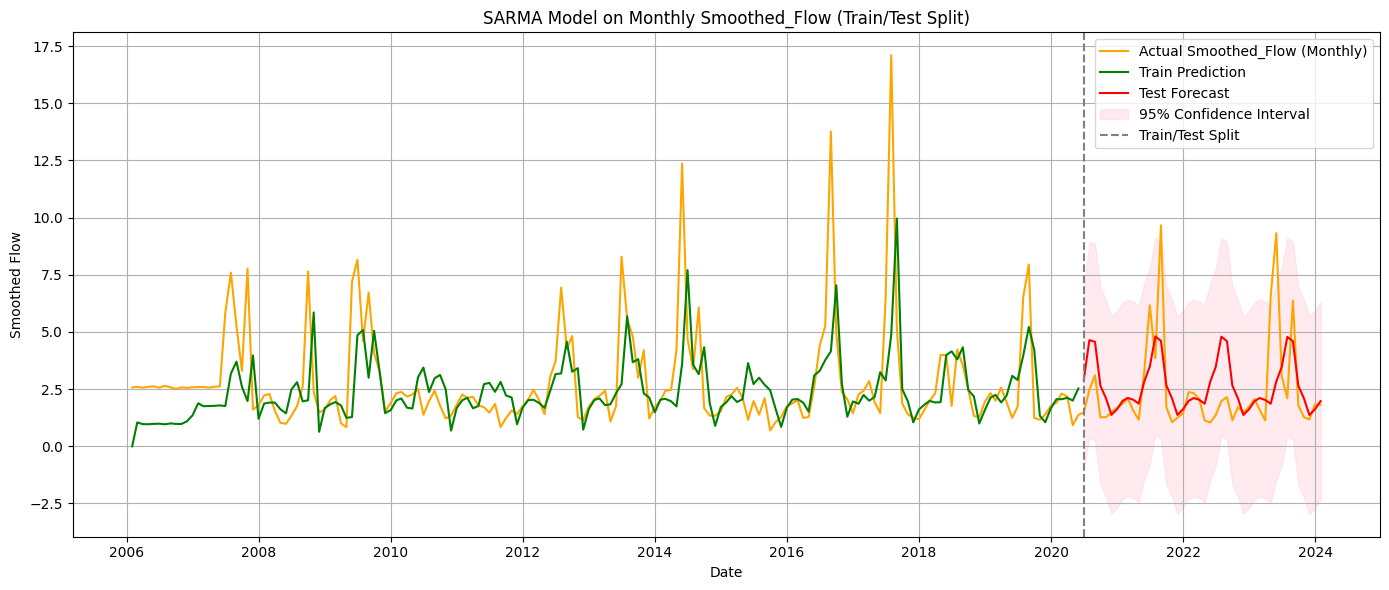

In [51]:
# 📦 Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from google.colab import files



# 🟠 Convert daily data to monthly average
y_monthly = df_indexed["Smoothed_Flow"].resample("M").mean()

# 🧪 Train/Test split (80% train, 20% test)
split_idx = int(len(y_monthly) * 0.8)
y_train = y_monthly.iloc[:split_idx]
y_test = y_monthly.iloc[split_idx:]

# 🧠 Fit SARMA model on training data only
model = SARIMAX(
    y_train,
    order=(1, 0, 1),
    seasonal_order=(1, 0, 1, 12),  # yearly seasonality
    enforce_stationarity=True,
    enforce_invertibility=True
)

results = model.fit(disp=False)

# 🧾 Summary (optional)
print(results.summary())

# 🔮 Predict both train and test
y_train_pred = results.fittedvalues
y_test_forecast = results.get_forecast(steps=len(y_test))
y_test_pred = y_test_forecast.predicted_mean
conf_int = y_test_forecast.conf_int()

# 📈 Plot actual vs predicted
plt.figure(figsize=(14, 6))
plt.plot(y_monthly, label='Actual Smoothed_Flow (Monthly)', color='orange')
plt.plot(y_train_pred, label='Train Prediction', color='green')
plt.plot(y_test_pred, label='Test Forecast', color='red')
plt.fill_between(
    y_test_pred.index,
    conf_int.iloc[:, 0],
    conf_int.iloc[:, 1],
    color='pink',
    alpha=0.3,
    label='95% Confidence Interval'
)

plt.axvline(y_test.index[0], color='gray', linestyle='--', label='Train/Test Split')
plt.title('SARMA Model on Monthly Smoothed_Flow (Train/Test Split)')
plt.xlabel('Date')
plt.ylabel('Smoothed Flow')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-52-2007952174>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y_monthly = df_indexed["Smoothed_Flow"].resample("M").mean()


                                     SARIMAX Results                                      
Dep. Variable:                      Smoothed_Flow   No. Observations:                  173
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -375.775
Date:                            Sun, 15 Jun 2025   AIC                            761.549
Time:                                    19:31:00   BIC                            777.316
Sample:                                01-31-2006   HQIC                           767.946
                                     - 05-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2922      0.260      1.124      0.261      -0.217       0.802
ma.L1          0.1343      0.278   

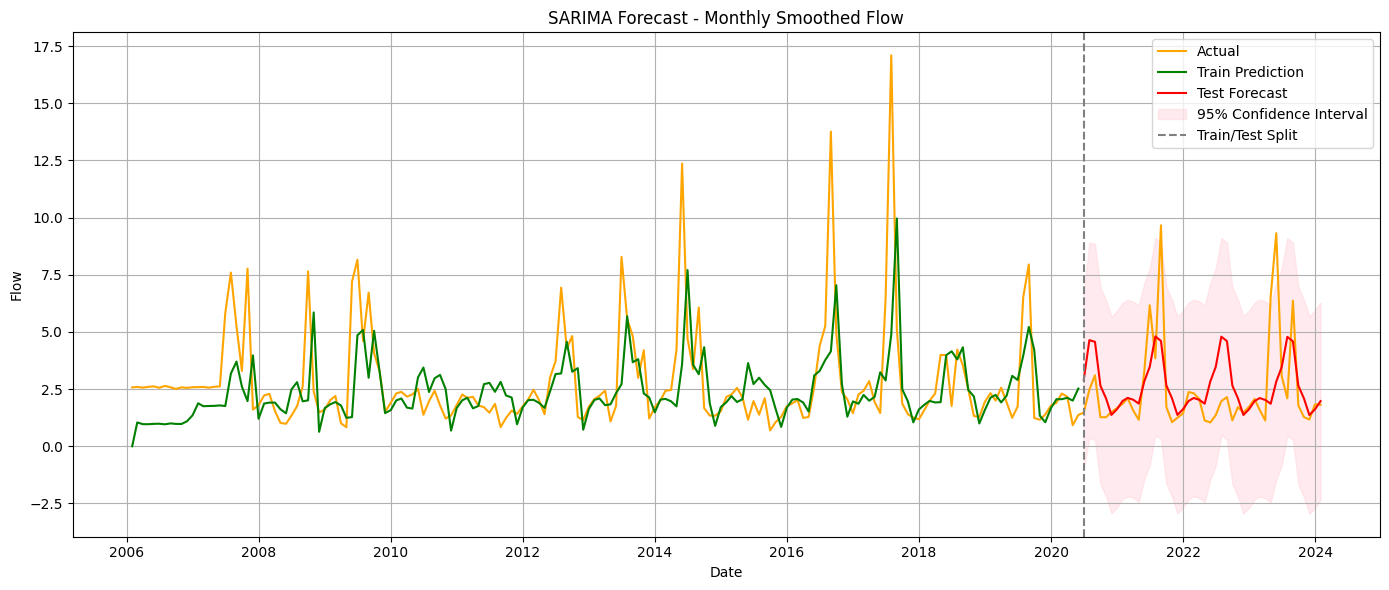


=== Coefficients and P-values ===
ar.L1       2.608940e-01
ma.L1       6.287252e-01
ar.S.L12    0.000000e+00
ma.S.L12    2.448940e-06
sigma2      1.072970e-10
dtype: float64


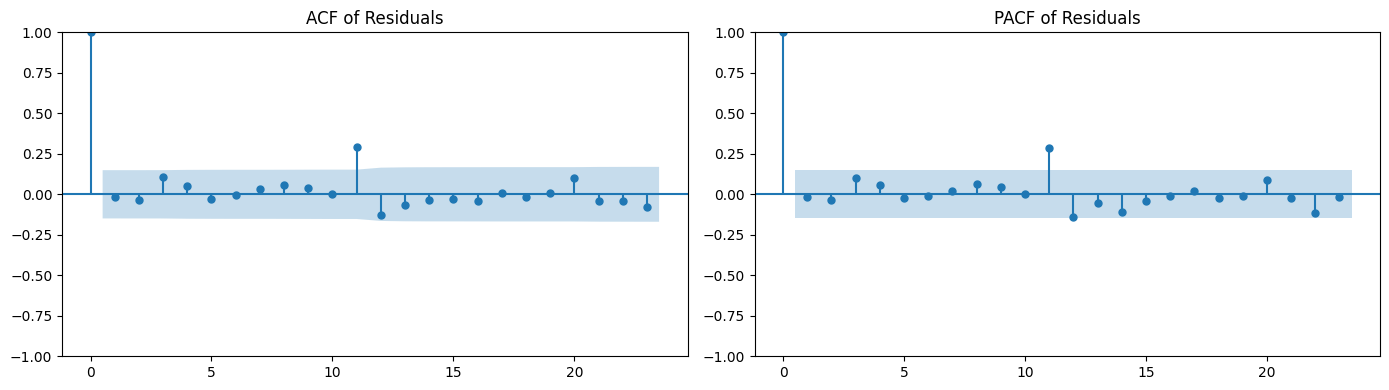


=== Ljung-Box Test (lag=12) ===
      lb_stat  lb_pvalue
12  23.267243   0.025541

=== Jarque-Bera Test ===
JB Statistic: 739.00, p-value: 0.0000, Skew: 2.25, Kurtosis: 12.07

=== Information Criteria ===
AIC: 761.55
BIC: 777.32


In [52]:
# 📦 Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import jarque_bera
from statsmodels.tools.eval_measures import aic, bic
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats
from google.colab import files

# 🟠 Convert daily data to monthly average
y_monthly = df_indexed["Smoothed_Flow"].resample("M").mean()

# 🧪 Train/Test split (80% train, 20% test)
split_idx = int(len(y_monthly) * 0.8)
y_train = y_monthly.iloc[:split_idx]
y_test = y_monthly.iloc[split_idx:]

# 🧠 Fit SARIMA model
model = SARIMAX(
    y_train,
    order=(1, 0, 1),
    seasonal_order=(1, 0, 1, 12),
    enforce_stationarity=True,
    enforce_invertibility=True
)

results = model.fit(disp=False)

# 🧾 Summary
print(results.summary())

# 🔮 Predict
y_train_pred = results.fittedvalues
y_test_forecast = results.get_forecast(steps=len(y_test))
y_test_pred = y_test_forecast.predicted_mean
conf_int = y_test_forecast.conf_int()

# 📈 Plot
plt.figure(figsize=(14, 6))
plt.plot(y_monthly, label='Actual', color='orange')
plt.plot(y_train_pred, label='Train Prediction', color='green')
plt.plot(y_test_pred, label='Test Forecast', color='red')
plt.fill_between(
    y_test_pred.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1],
    color='pink', alpha=0.3, label='95% Confidence Interval'
)
plt.axvline(y_test.index[0], color='gray', linestyle='--', label='Train/Test Split')
plt.title('SARIMA Forecast - Monthly Smoothed Flow')
plt.xlabel('Date')
plt.ylabel('Flow')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔍 Step 2: Coefficient Significance
print("\n=== Coefficients and P-values ===")
print(results.pvalues)

# 🔁 Step 3: ACF/PACF Residuals
residuals = results.resid
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(residuals.dropna(), ax=axes[0])
plot_pacf(residuals.dropna(), ax=axes[1])
axes[0].set_title("ACF of Residuals")
axes[1].set_title("PACF of Residuals")
plt.tight_layout()
plt.show()

# 📉 Step 4: Ljung-Box Test (white noise check)
ljung_box = acorr_ljungbox(residuals, lags=[12], return_df=True)
print("\n=== Ljung-Box Test (lag=12) ===")
print(ljung_box)

# 🧪 Step 5: Jarque-Bera Test (normality)
jb_test_stat, jb_pvalue, skew, kurtosis = jarque_bera(residuals)
print("\n=== Jarque-Bera Test ===")
print(f"JB Statistic: {jb_test_stat:.2f}, p-value: {jb_pvalue:.4f}, Skew: {skew:.2f}, Kurtosis: {kurtosis:.2f}")

# ℹ️ Info Criteria
print("\n=== Information Criteria ===")
print(f"AIC: {results.aic:.2f}")
print(f"BIC: {results.bic:.2f}")


                                     SARIMAX Results                                      
Dep. Variable:                      Smoothed_Flow   No. Observations:                  173
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -345.566
Date:                            Sun, 15 Jun 2025   AIC                            707.131
Time:                                    21:26:17   BIC                            732.358
Sample:                                01-31-2006   HQIC                           717.365
                                     - 05-31-2020                                         
Covariance Type:                              opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Mean_Rainfall        -1.0654      0.466     -2.284      0.022      -1.980      -0.151
Mean_Temp     

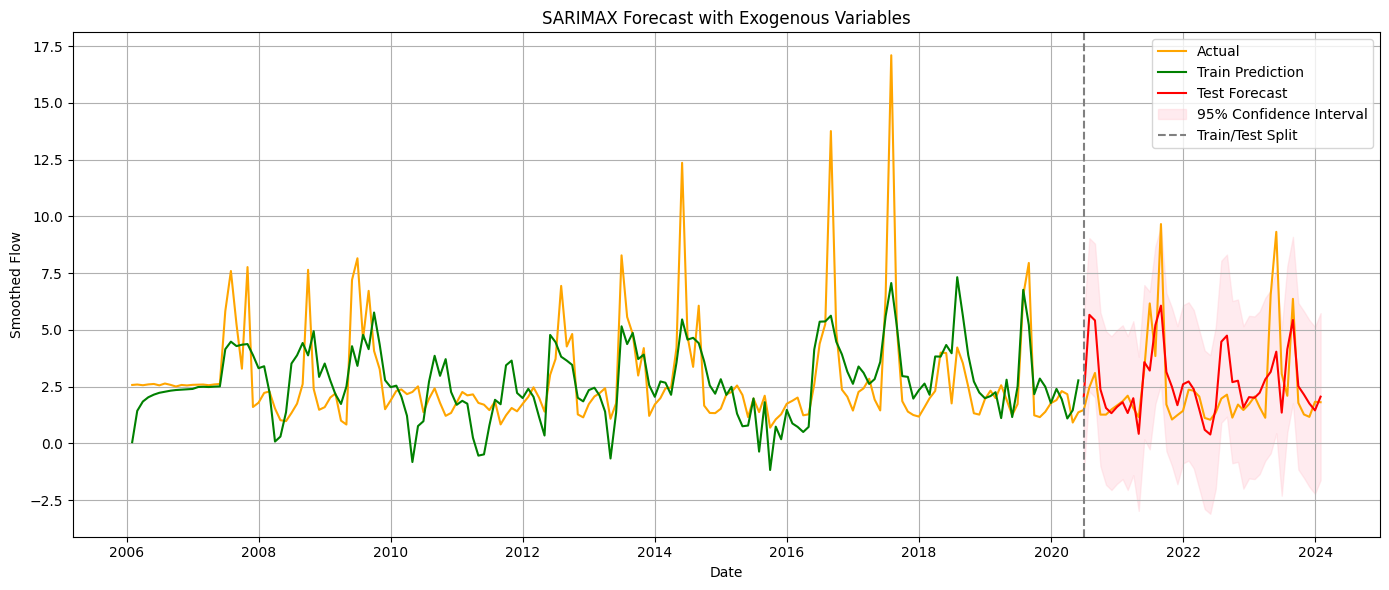


=== Coefficients and P-values ===
Mean_Rainfall        2.235354e-02
Mean_Temp            7.936027e-01
Actual_Lake_Level    3.462724e-17
ar.L1                0.000000e+00
ma.L1                2.212863e-83
ar.S.L12             2.699112e-65
ma.S.L12             6.599663e-10
sigma2               7.099951e-23
dtype: float64


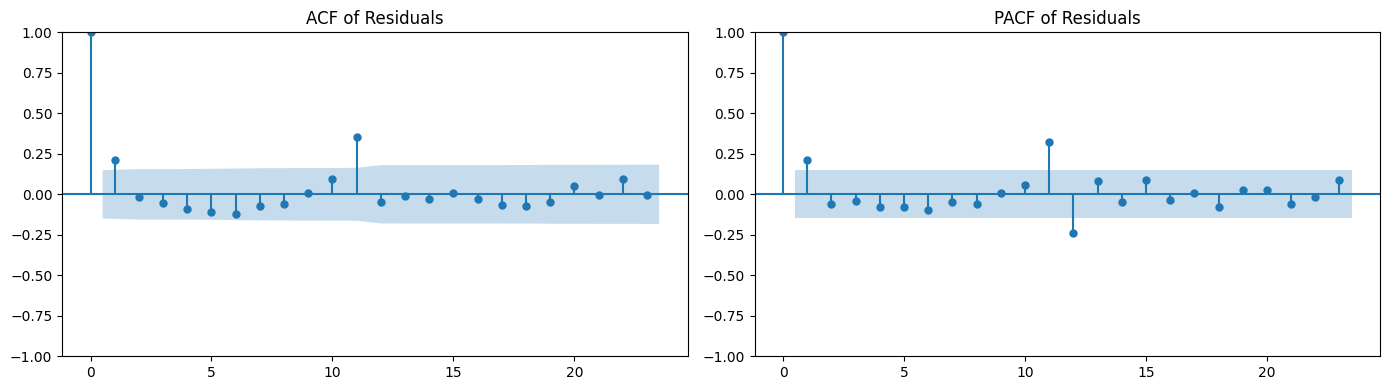


=== Ljung-Box Test (lag=12) ===
      lb_stat  lb_pvalue
12  42.426193   0.000028

=== Jarque-Bera Test ===
JB Statistic: 598.72, p-value: 0.0000, Skew: 2.10, Kurtosis: 11.08

=== Information Criteria ===
AIC: 707.13
BIC: 732.36


In [37]:
# 📦 Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import jarque_bera
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from google.colab import files

# 🟠 Convert daily data to monthly average
y_monthly = df_indexed["Smoothed_Flow"].resample("M").mean()

# ✅ Convert exogenous variables to monthly as well
exog_monthly = df_indexed[['Mean_Rainfall', 'Mean_Temp', 'Actual_Lake_Level']].resample("M").mean()

# 🧪 Train/Test split (80% train, 20% test)
split_idx = int(len(y_monthly) * 0.8)
y_train = y_monthly.iloc[:split_idx]
y_test = y_monthly.iloc[split_idx:]

# ✅ Train/Test split for exog
exog_train = exog_monthly.iloc[:split_idx]
exog_test = exog_monthly.iloc[split_idx:]

# 🧠 Fit SARIMAX model with exogenous variables
model = SARIMAX(
    y_train,
    exog=exog_train,  # ✅ اینجا exog اضافه شده
    order=(1, 0, 1),
    seasonal_order=(1, 0, 1, 12),
    enforce_stationarity=True,
    enforce_invertibility=True
)

results = model.fit(disp=False)

# 🧾 Summary (optional)
print(results.summary())

# 🔮 Predict both train and test
y_train_pred = results.fittedvalues
y_test_forecast = results.get_forecast(steps=len(y_test), exog=exog_test)  # ✅ اینجا هم exog باید باشه
y_test_pred = y_test_forecast.predicted_mean
conf_int = y_test_forecast.conf_int()

# 📈 Plot actual vs predicted
plt.figure(figsize=(14, 6))
plt.plot(y_monthly, label='Actual', color='orange')
plt.plot(y_train_pred, label='Train Prediction', color='green')
plt.plot(y_test_pred, label='Test Forecast', color='red')
plt.fill_between(
    y_test_pred.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1],
    color='pink', alpha=0.3, label='95% Confidence Interval'
)
plt.axvline(y_test.index[0], color='gray', linestyle='--', label='Train/Test Split')
plt.title('SARIMAX Forecast with Exogenous Variables')
plt.xlabel('Date')
plt.ylabel('Smoothed Flow')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔍 Step 2: Coefficient Significance
print("\n=== Coefficients and P-values ===")
print(results.pvalues)

# 🔁 Step 3: ACF/PACF Residuals
residuals = results.resid
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(residuals.dropna(), ax=axes[0])
plot_pacf(residuals.dropna(), ax=axes[1])
axes[0].set_title("ACF of Residuals")
axes[1].set_title("PACF of Residuals")
plt.tight_layout()
plt.show()

# 📉 Step 4: Ljung-Box Test
ljung_box = acorr_ljungbox(residuals, lags=[12], return_df=True)
print("\n=== Ljung-Box Test (lag=12) ===")
print(ljung_box)

# 🧪 Step 5: Jarque-Bera Test
jb_test_stat, jb_pvalue, skew, kurtosis = jarque_bera(residuals)
print("\n=== Jarque-Bera Test ===")
print(f"JB Statistic: {jb_test_stat:.2f}, p-value: {jb_pvalue:.4f}, Skew: {skew:.2f}, Kurtosis: {kurtosis:.2f}")

# ℹ️ Info Criteria
print("\n=== Information Criteria ===")
print(f"AIC: {results.aic:.2f}")
print(f"BIC: {results.bic:.2f}")


<ipython-input-38-297866543>:12: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y_monthly = df_indexed["Smoothed_Flow"].resample("M").mean()
<ipython-input-38-297866543>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  exog_monthly = df_indexed[['Mean_Rainfall', 'Mean_Temp']].resample("M").mean()


                                     SARIMAX Results                                      
Dep. Variable:                      Smoothed_Flow   No. Observations:                  173
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -371.405
Date:                            Sun, 15 Jun 2025   AIC                            756.811
Time:                                    21:26:29   BIC                            778.884
Sample:                                01-31-2006   HQIC                           765.765
                                     - 05-31-2020                                         
Covariance Type:                              opg                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Mean_Rainfall    -1.7013      0.513     -3.319      0.001      -2.706      -0.697
Mean_Temp        -0.7856  

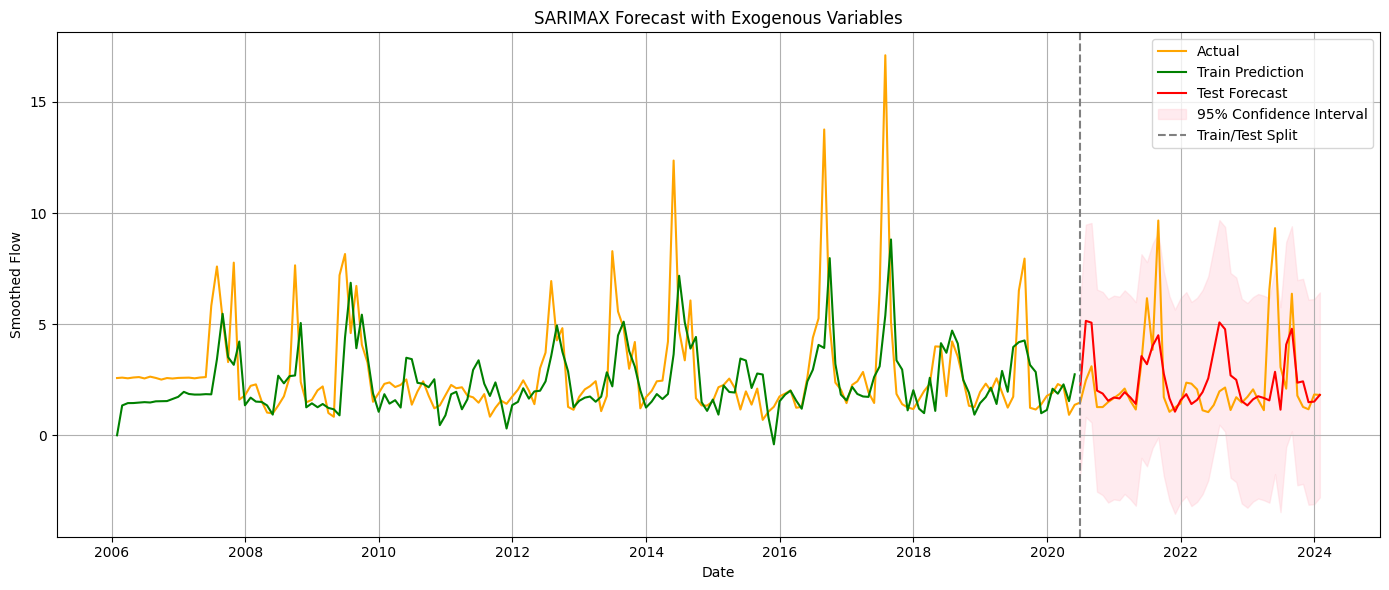


=== Coefficients and P-values ===
Mean_Rainfall     9.039171e-04
Mean_Temp         3.063631e-01
ar.L1             2.710821e-05
ma.L1             3.712726e-01
ar.S.L12         3.606254e-231
ma.S.L12          2.921806e-06
sigma2            9.102280e-14
dtype: float64


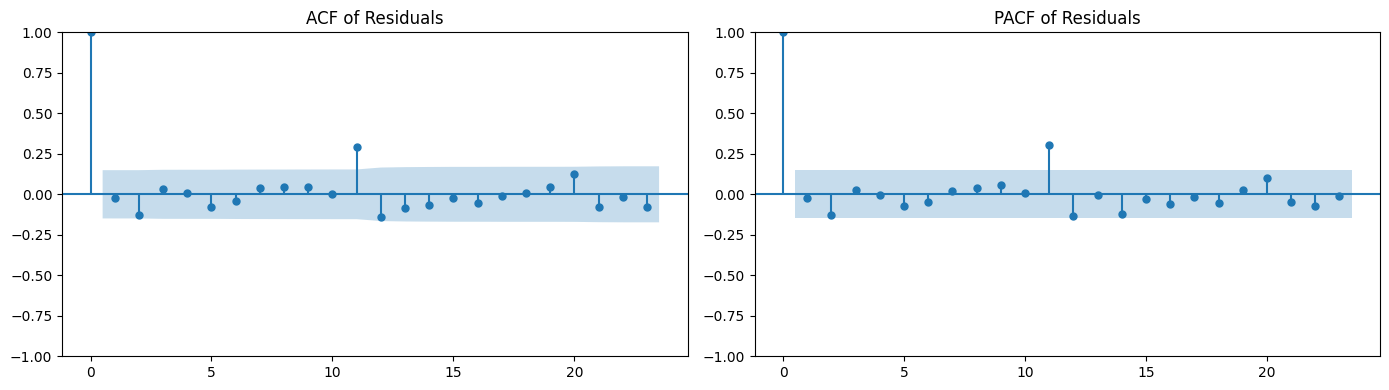


=== Ljung-Box Test (lag=12) ===
      lb_stat  lb_pvalue
12  24.823877    0.01568

=== Jarque-Bera Test ===
JB Statistic: 746.76, p-value: 0.0000, Skew: 2.30, Kurtosis: 12.08

=== Information Criteria ===
AIC: 756.81
BIC: 778.88


In [38]:
# 📦 Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import jarque_bera
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from google.colab import files

# 🟠 Convert daily data to monthly average
y_monthly = df_indexed["Smoothed_Flow"].resample("M").mean()

# ✅ Convert exogenous variables to monthly as well
exog_monthly = df_indexed[['Mean_Rainfall', 'Mean_Temp']].resample("M").mean()

# 🧪 Train/Test split (80% train, 20% test)
split_idx = int(len(y_monthly) * 0.8)
y_train = y_monthly.iloc[:split_idx]
y_test = y_monthly.iloc[split_idx:]

# ✅ Train/Test split for exog
exog_train = exog_monthly.iloc[:split_idx]
exog_test = exog_monthly.iloc[split_idx:]

# 🧠 Fit SARIMAX model with exogenous variables
model = SARIMAX(
    y_train,
    exog=exog_train,  # ✅ اینجا exog اضافه شده
    order=(1, 0, 1),
    seasonal_order=(1, 0, 1, 12),
    enforce_stationarity=True,
    enforce_invertibility=True
)

results = model.fit(disp=False)

# 🧾 Summary (optional)
print(results.summary())

# 🔮 Predict both train and test
y_train_pred = results.fittedvalues
y_test_forecast = results.get_forecast(steps=len(y_test), exog=exog_test)  # ✅ اینجا هم exog باید باشه
y_test_pred = y_test_forecast.predicted_mean
conf_int = y_test_forecast.conf_int()

# 📈 Plot actual vs predicted
plt.figure(figsize=(14, 6))
plt.plot(y_monthly, label='Actual', color='orange')
plt.plot(y_train_pred, label='Train Prediction', color='green')
plt.plot(y_test_pred, label='Test Forecast', color='red')
plt.fill_between(
    y_test_pred.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1],
    color='pink', alpha=0.3, label='95% Confidence Interval'
)
plt.axvline(y_test.index[0], color='gray', linestyle='--', label='Train/Test Split')
plt.title('SARIMAX Forecast with Exogenous Variables')
plt.xlabel('Date')
plt.ylabel('Smoothed Flow')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔍 Step 2: Coefficient Significance
print("\n=== Coefficients and P-values ===")
print(results.pvalues)

# 🔁 Step 3: ACF/PACF Residuals
residuals = results.resid
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(residuals.dropna(), ax=axes[0])
plot_pacf(residuals.dropna(), ax=axes[1])
axes[0].set_title("ACF of Residuals")
axes[1].set_title("PACF of Residuals")
plt.tight_layout()
plt.show()

# 📉 Step 4: Ljung-Box Test
ljung_box = acorr_ljungbox(residuals, lags=[12], return_df=True)
print("\n=== Ljung-Box Test (lag=12) ===")
print(ljung_box)

# 🧪 Step 5: Jarque-Bera Test
jb_test_stat, jb_pvalue, skew, kurtosis = jarque_bera(residuals)
print("\n=== Jarque-Bera Test ===")
print(f"JB Statistic: {jb_test_stat:.2f}, p-value: {jb_pvalue:.4f}, Skew: {skew:.2f}, Kurtosis: {kurtosis:.2f}")

# ℹ️ Info Criteria
print("\n=== Information Criteria ===")
print(f"AIC: {results.aic:.2f}")
print(f"BIC: {results.bic:.2f}")

<ipython-input-52-1845339541>:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  y_monthly = df_indexed["Smoothed_Flow"].resample("M").mean()
<ipython-input-52-1845339541>:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  exog_monthly = df_indexed[['Mean_Rainfall', 'Mean_Temp', 'Actual_Lake_Level']].resample("M").mean()
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                      SARIMAX Results                                       
Dep. Variable:                        Smoothed_Flow   No. Observations:                  173
Model:             SARIMAX(2, 0, 2)x(1, 0, [1], 12)   Log Likelihood                -337.905
Date:                              Sun, 15 Jun 2025   AIC                            695.811
Time:                                      22:39:32   BIC                            727.344
Sample:                                  01-31-2006   HQIC                           708.604
                                       - 05-31-2020                                         
Covariance Type:                                opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Mean_Rainfall        -0.9593      0.568     -1.690      0.091      -2.072       0.15

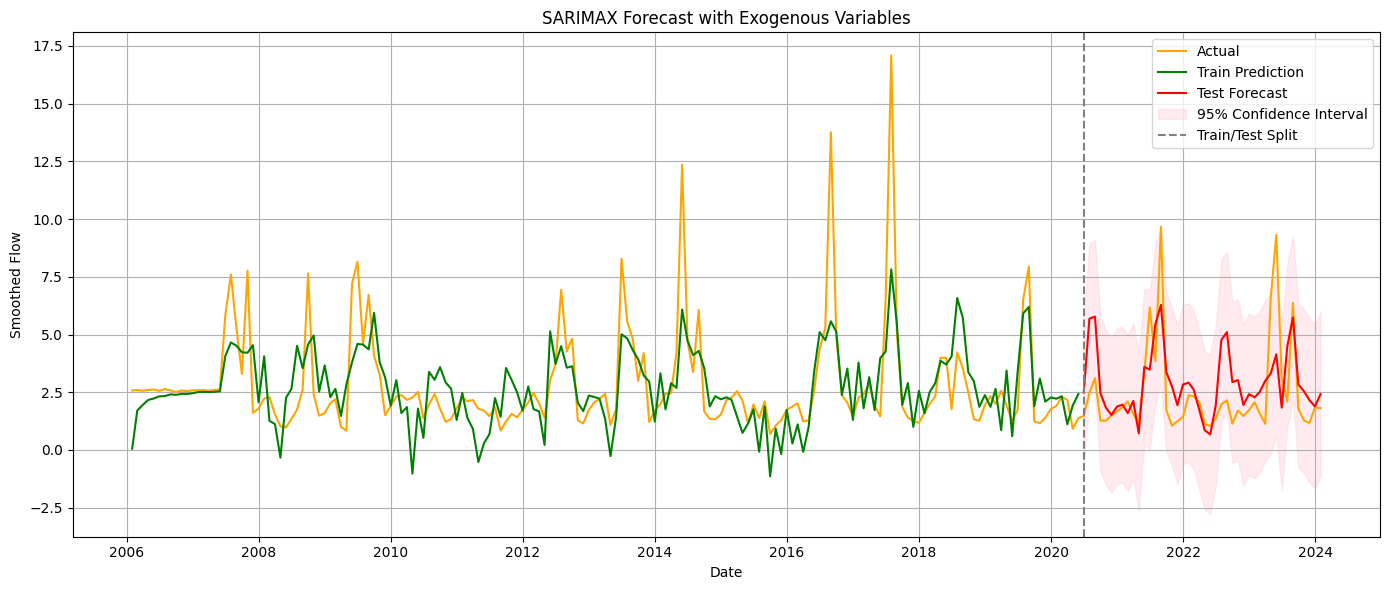


=== Coefficients and P-values ===
Mean_Rainfall        9.101859e-02
Mean_Temp            6.966858e-01
Actual_Lake_Level    1.954504e-17
ar.L1                4.149589e-03
ar.L2                7.616310e-41
ma.L1                9.998862e-01
ma.L2                9.763694e-01
ar.S.L12             1.225855e-38
ma.S.L12             8.406016e-07
sigma2               9.763612e-01
dtype: float64


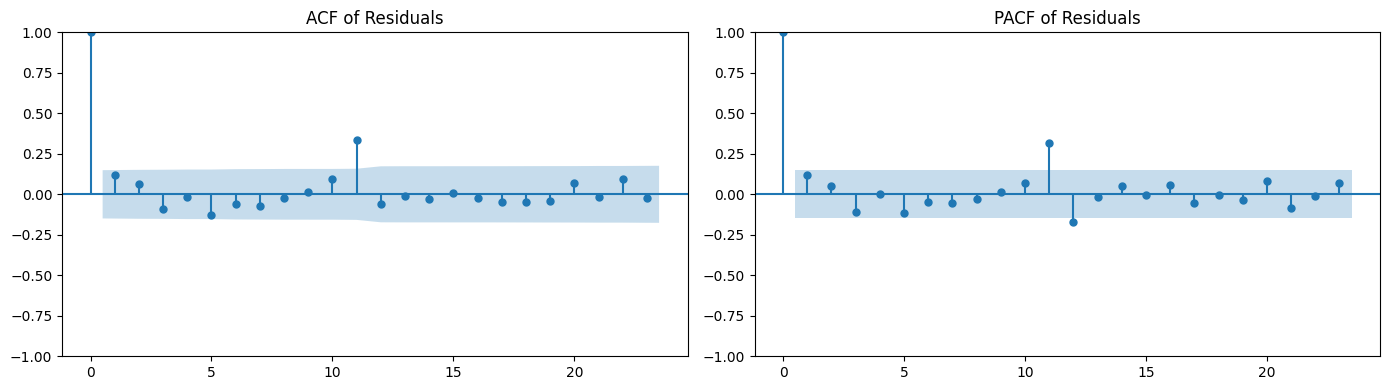


=== Ljung-Box Test (lag=12) ===
      lb_stat  lb_pvalue
12  32.592844    0.00112

=== Jarque-Bera Test ===
JB Statistic: 504.93, p-value: 0.0000, Skew: 1.89, Kurtosis: 10.47

=== Information Criteria ===
AIC: 695.81
BIC: 727.34

=== Forecast Accuracy Metrics ===
MAE  : 1.27
RMSE : 1.70
MAPE : 59.17%


In [52]:
# 📦 Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import jarque_bera
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from google.colab import files

# 🟠 Convert daily data to monthly average
y_monthly = df_indexed["Smoothed_Flow"].resample("M").mean()

# ✅ Prepare exogenous variables (monthly average)
exog_monthly = df_indexed[['Mean_Rainfall', 'Mean_Temp', 'Actual_Lake_Level']].resample("M").mean()

# 🧪 Train/Test split (80% train, 20% test)
split_idx = int(len(y_monthly) * 0.8)
y_train = y_monthly.iloc[:split_idx]
y_test = y_monthly.iloc[split_idx:]

exog_train = exog_monthly.iloc[:split_idx]
exog_test = exog_monthly.iloc[split_idx:]

# 🧠 Fit SARIMAX model
model = SARIMAX(
    y_train,
    exog=exog_train,
    order=(2, 0, 2),
    seasonal_order=(1, 0, 1, 12),
    enforce_stationarity=True,
    enforce_invertibility=True
)
results = model.fit(disp=False)

# 🧾 Summary
print(results.summary())

# 🔮 Predict
y_train_pred = results.fittedvalues
y_test_forecast = results.get_forecast(steps=len(y_test), exog=exog_test)
y_test_pred = y_test_forecast.predicted_mean
conf_int = y_test_forecast.conf_int()

# 📈 Plot predictions
plt.figure(figsize=(14, 6))
plt.plot(y_monthly, label='Actual', color='orange')
plt.plot(y_train_pred, label='Train Prediction', color='green')
plt.plot(y_test_pred, label='Test Forecast', color='red')
plt.fill_between(
    y_test_pred.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1],
    color='pink', alpha=0.3, label='95% Confidence Interval'
)
plt.axvline(y_test.index[0], color='gray', linestyle='--', label='Train/Test Split')
plt.title('SARIMAX Forecast with Exogenous Variables')
plt.xlabel('Date')
plt.ylabel('Smoothed Flow')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 Coefficient Significance
print("\n=== Coefficients and P-values ===")
print(results.pvalues)

# 🔁 ACF/PACF of Residuals
residuals = results.resid
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
plot_acf(residuals.dropna(), ax=axes[0])
plot_pacf(residuals.dropna(), ax=axes[1])
axes[0].set_title("ACF of Residuals")
axes[1].set_title("PACF of Residuals")
plt.tight_layout()
plt.show()

# 📉 Ljung-Box Test
ljung_box = acorr_ljungbox(residuals, lags=[12], return_df=True)
print("\n=== Ljung-Box Test (lag=12) ===")
print(ljung_box)

# 🧪 Jarque-Bera Test
jb_stat, jb_pval, skew, kurt = jarque_bera(residuals)
print("\n=== Jarque-Bera Test ===")
print(f"JB Statistic: {jb_stat:.2f}, p-value: {jb_pval:.4f}, Skew: {skew:.2f}, Kurtosis: {kurt:.2f}")

# ℹ️ Information Criteria
print("\n=== Information Criteria ===")
print(f"AIC: {results.aic:.2f}")
print(f"BIC: {results.bic:.2f}")

# ✅ Forecast Accuracy Metrics (Test Set)
mae = mean_absolute_error(y_test, y_test_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
mape = np.mean(np.abs((y_test - y_test_pred) / y_test.replace(0, np.nan))) * 100

print("\n=== Forecast Accuracy Metrics ===")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}%")


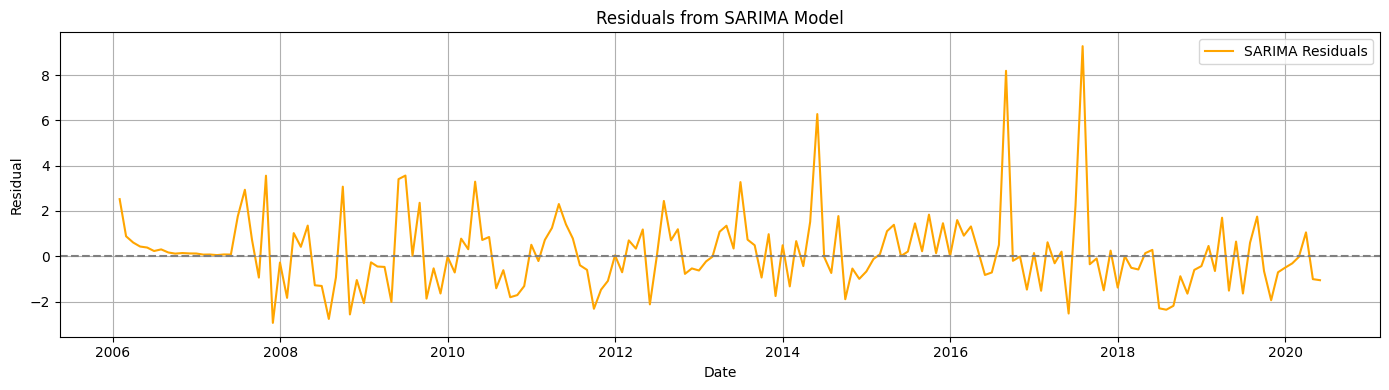

In [53]:
# 📉 Get residuals from model
residuals = results.resid

# 🖼️ Plot residuals over time
plt.figure(figsize=(14, 4))
plt.plot(residuals, label="SARIMA Residuals", color='orange')
plt.axhline(0, linestyle='--', color='gray')
plt.title("Residuals from SARIMA Model")
plt.xlabel("Date")
plt.ylabel("Residual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


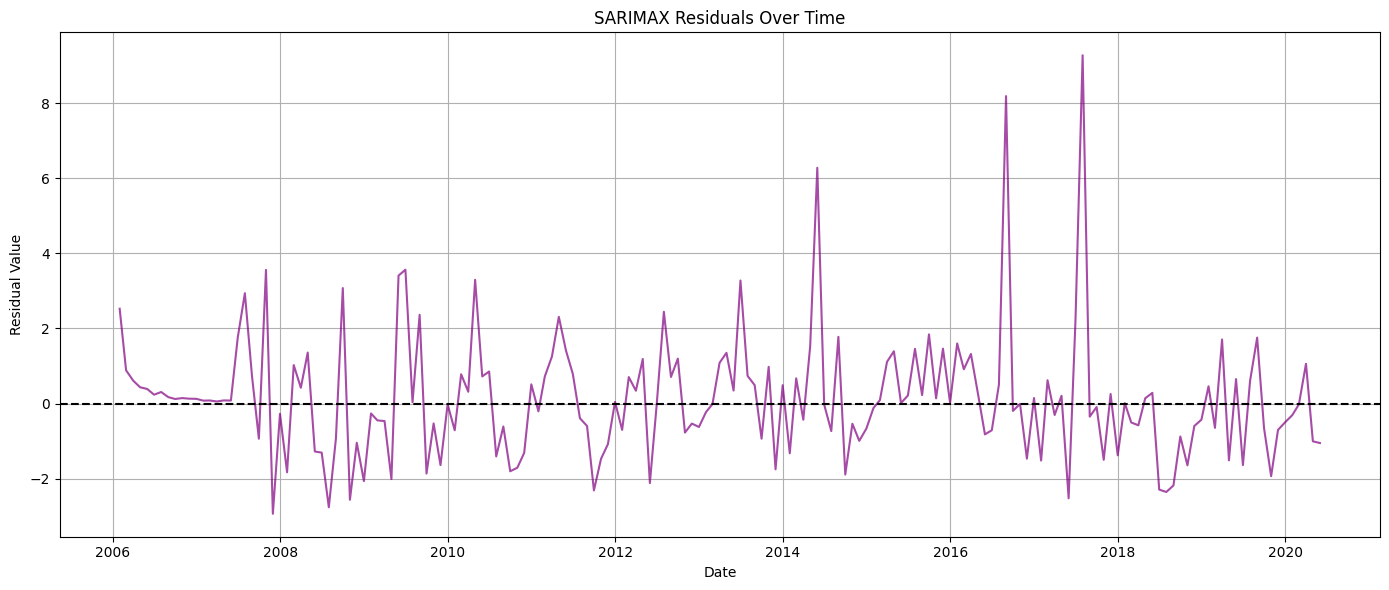

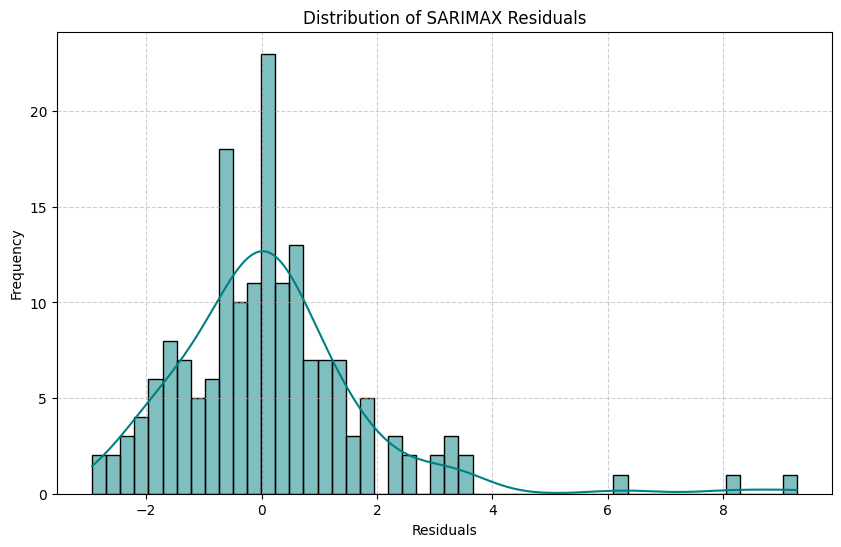

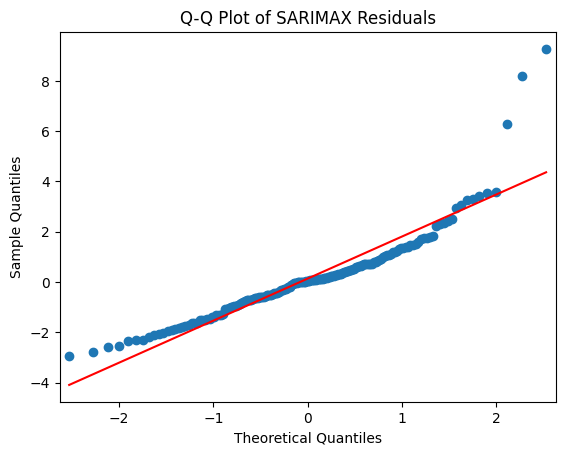

In [45]:
# prompt: give me the plot for sarimax residuals

from sklearn.metrics import mean_absolute_error

# Plot the residuals over time
plt.figure(figsize=(14, 6))
plt.plot(residuals.index, residuals, color='purple', alpha=0.7)
plt.axhline(0, color='k', linestyle='--')
plt.title('SARIMAX Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.grid(True)
plt.tight_layout()
plt.show()

# Make histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals.dropna(), kde=True, color='teal', bins=50)
plt.title('Distribution of SARIMAX Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Make Q-Q plot of residuals
sm.qqplot(residuals.dropna(), line='s') # 's' for a standardized line
plt.title('Q-Q Plot of SARIMAX Residuals')
plt.show()

In [ ]:
# ✅ Install dependencies (if needed in Colab)
!pip install tensorflow pandas matplotlib scikit-learn

# 📦 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from google.colab import files



# 🟠 Monthly average of Smoothed_Flow
y = df_indexed["Smoothed_Flow"].resample("M").mean()

# 🔄 Normalize data
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# 🧪 Train/Test split (80/20)
split_idx = int(len(y_scaled) * 0.8)
train_scaled = y_scaled[:split_idx]
test_scaled = y_scaled[split_idx:]

# 🧠 Create sequences
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

window_size = 12  # 12 months
X_train, y_train = create_sequences(train_scaled, window_size)
X_test, y_test = create_sequences(test_scaled, window_size)

# Reshape for LSTM input
X_train = X_train.reshape(-1, window_size, 1)
X_test = X_test.reshape(-1, window_size, 1)

# 🧠 Build LSTM model
model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(window_size, 1)),
    Dropout(0.2),
    LSTM(32, activation='relu'),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

# ⏳ Train with EarlyStopping
early_stop = EarlyStopping(monitor='loss', patience=20, restore_best_weights=True)
model.fit(X_train, y_train, epochs=300, batch_size=16, verbose=0, callbacks=[early_stop])

# 🔮 Predict
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_actual = scaler.inverse_transform(y_test)

# 📈 Plot
plt.figure(figsize=(14,6))
test_index = y.index[split_idx + window_size:]
plt.plot(y.index, y.values, label="Actual", color='orange')
plt.plot(test_index, y_pred, label="LSTM Forecast", color='red')
plt.axvline(test_index[0], color='gray', linestyle='--', label='Train/Test Split')
plt.title("LSTM Forecast on Monthly Smoothed_Flow")
plt.xlabel("Date")
plt.ylabel("Smoothed Flow")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 📏 Evaluation Metrics
mae = mean_absolute_error(y_test_actual, y_pred)
rmse = mean_squared_error(y_test_actual, y_pred, squared=False)
mape = np.mean(np.abs((y_test_actual - y_pred) / y_test_actual)) * 100

print("📊 Evaluation Metrics on Test Data:")
print(f"MAE  (Mean Absolute Error):      {mae:.4f}")
print(f"RMSE (Root Mean Squared Error):  {rmse:.4f}")
print(f"MAPE (Mean Absolute % Error):    {mape:.2f}%")
